In [52]:
## writing dsq files: corrupt
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/4.0.3-foss-2020b; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [19]:
## writing dsq files: corrupt rescue
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [8]:
## writing dsq files: tissue_number
tissue_number <- c(3:40)
writefunc <-"  "
for(i in seq(length(tissue_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R ', tissue_number[i],' 500 8 0.3 1 1 50 ',100+i," tissue_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [4]:
## writing dsq files: tissue_number for 50 times
tissue_number <- c(3:40)
iteration <- c(1:15)
writefunc <-"  "
for(i in seq(length(tissue_number))){
    for(j in iteration){
         writefunc <- rbind(writefunc, paste0('module load R/4.0.3-foss-2020b; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R ', tissue_number[i],' 500 8 0.25 1 1 30 ',100+j," tissue_number"))
    }
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [20]:
## writing dsq files: tissue_number rescue
tissue_number <- c(3:40)
writefunc <-"  "
for(i in seq(length(tissue_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R ', tissue_number[i],' 500 8 0.3 1 1 100 ',100+i," tissue_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [9]:
## writing dsq files: gene_number
gene_number <- c(5:60)*30
writefunc <-"  "
for(i in seq(length(gene_number))){
 writefunc <- rbind(writefunc, paste0('module load R/4.0.3-foss-2020b; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 ',gene_number[i],' 8 0.3 1 1 100 ',100+i," gene_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [5]:
## writing dsq files: gene_number
gene_number <- c(5:60)*30
iteration <- c(1:15)
writefunc <-"  "
for(i in seq(length(gene_number))){
    for(j in iteration){
 writefunc <- rbind(writefunc, paste0('module load R/4.0.3-foss-2020b; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 ',gene_number[i],' 8 0.25 1 1 30 ',100+j," gene_number"))
}
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [21]:
## writing dsq files: gene_number rescue
gene_number <- c(5:200)*10
writefunc <-"  "
for(i in seq(length(gene_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R 5 ',gene_number[i],' 8 0.6 1 1 100 ',100+i," gene_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [1]:
## writing dsq files: pi
empirical_pi <- c(1:100)/100
update.pi <- c(TRUE, FALSE)
writefunc <-"  "
for(i in seq(length(empirical_pi))){
    for(j in c(1:2)){
        writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v3.R 5 500 8 0.6 1 1 100 ',100+i," pi 0.4 ",update.pi[j]," ",empirical_pi[i]))
    }
 
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/pi_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [2]:
## writing dsq files: tau_v
tau_v = c(0.01,0.1,1,4,20,100)
writefunc <-"  "
for(i in seq(length(tau_v))){

        writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v3.R 5 500 8 0.4 1 1 100 ',100+i," tau_v ",tau_v[i]," TRUE 0.3"))

 
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tau_v_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [ ]:
## writing dsq files
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [1]:
set.seed(2021)
library(nnls)
library(ggplot2)
library(plotROC)
library(Seurat)
library(cowplot)
library(gridExtra)
options(repr.plot.width=14, repr.plot.height=10)

In [2]:
get_summary.info <- function(files_rst,files_rst_frac,files_same_input){
    summary.info <- list()

    summary.info$cor.same <- c()
    summary.info$cor.music <- c()
    summary.info$cor.nnls <- c()

    summary.info$z_true <- list()
    summary.info$z_same <- list()
    summary.info$z_music <- list()
    summary.info$z_nnls <- list()

    summary.info$W_tilde <- list()
    summary.info$est_gamma <- list()
    summary.info$true_gamma <- list()

    summary.info$true_vg <- list()
    summary.info$est_vg <- list()

    summary.info$true_w <- list() 
    summary.info$est_w <- list() 

    mcmc_samples_theta1 =100
    
    delete.idx <- c()
    keep.idx <- c()

    for(i in seq(length(files_rst))){
    #for(i in 1:2){
        rst <- tryCatch(readRDS(files_rst[i]), error=function(e) NULL)
        rst_frac <- tryCatch(readRDS(files_rst_frac[i]), error=function(e) NULL)
        same_input <- tryCatch(readRDS(files_same_input[i]), error=function(e) NULL)
        if(is.null(rst) || is.null(rst_frac) || is.null(same_input)){
            delete.idx <- c(delete.idx, i)
            next
        }else{
            keep.idx <- c(keep.idx, i)
        }                      
                               
        #print(i)
        if(i==524) print(str(same_input$true_Z))                       
        true_z = t(same_input$true_Z)
        true_w =  same_input$true_w$w ## true w for T tissues
        true_v = same_input$true_w$v 
        true_gamma = same_input$true_w$gamma
        W_tilde = same_input$W_tilde 


        summary.info$z_tranSig[[i]] <- rst_frac$z_est_tranSig
        summary.info$z_music[[i]] <- rst_frac$z_est_music
        summary.info$z_empirical[[i]] <- rst_frac$z_est_empirical
        summary.info$z_true[[i]] <- true_z

        summary.info$cor.same <- append(summary.info$cor.same, cor(as.vector(rst_frac$z_est_tranSig),as.vector(true_z)))
        summary.info$cor.music <- append(summary.info$cor.music, cor(as.vector(rst_frac$z_est_music),as.vector(true_z)))
        summary.info$cor.empirical <- append(summary.info$cor.empirical, cor(as.vector(rst_frac$z_est_empirical),as.vector(true_z)))


        summary.info$W_tilde[[i]] <- W_tilde
        summary.info$est_gamma[[i]] <- rst$averg_gamma
        summary.info$true_gamma[[i]] <- true_gamma

        summary.info$true_vg[[i]] <- true_v * true_gamma 
        summary.info$est_vg[[i]] <-  rst$vg

        summary.info$true_w[[i]] <- true_w 
        summary.info$est_w[[i]] <-  rst$theta1$w[[1]]

    }
    summary.info$delete.idx <- delete.idx
    summary.info$keep.idx <- keep.idx 
    return(summary.info)
}

In [42]:
files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/corrupt',pattern = "rst.T=5*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/corrupt',pattern = "rst_frac.*", full.names = TRUE)

files_input <- paste0("/gpfs/ysm/scratch60/cpsc424/wd262/sc_immune/simulation/corrupt/",c(1:100),'/')
files_same_input = paste0(files_input,c(101:200),'/raw_same_input.rds')
files_X1 = paste0(files_input,c(1:100),'/X_1.rds')
files_Y0 = paste0(files_input,c(1:100),'/Y0.txt')

In [32]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.corrupt.rds")

In [37]:
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.corrupt.rds")

In [43]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)

In [44]:
corrupt_pi <- c(1:100)/100
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 corrupt_pi = rep(c(1:100)/100,3),
                 method = c(rep("SAME",100),rep("MuSiC",100),rep("empirical",100)))

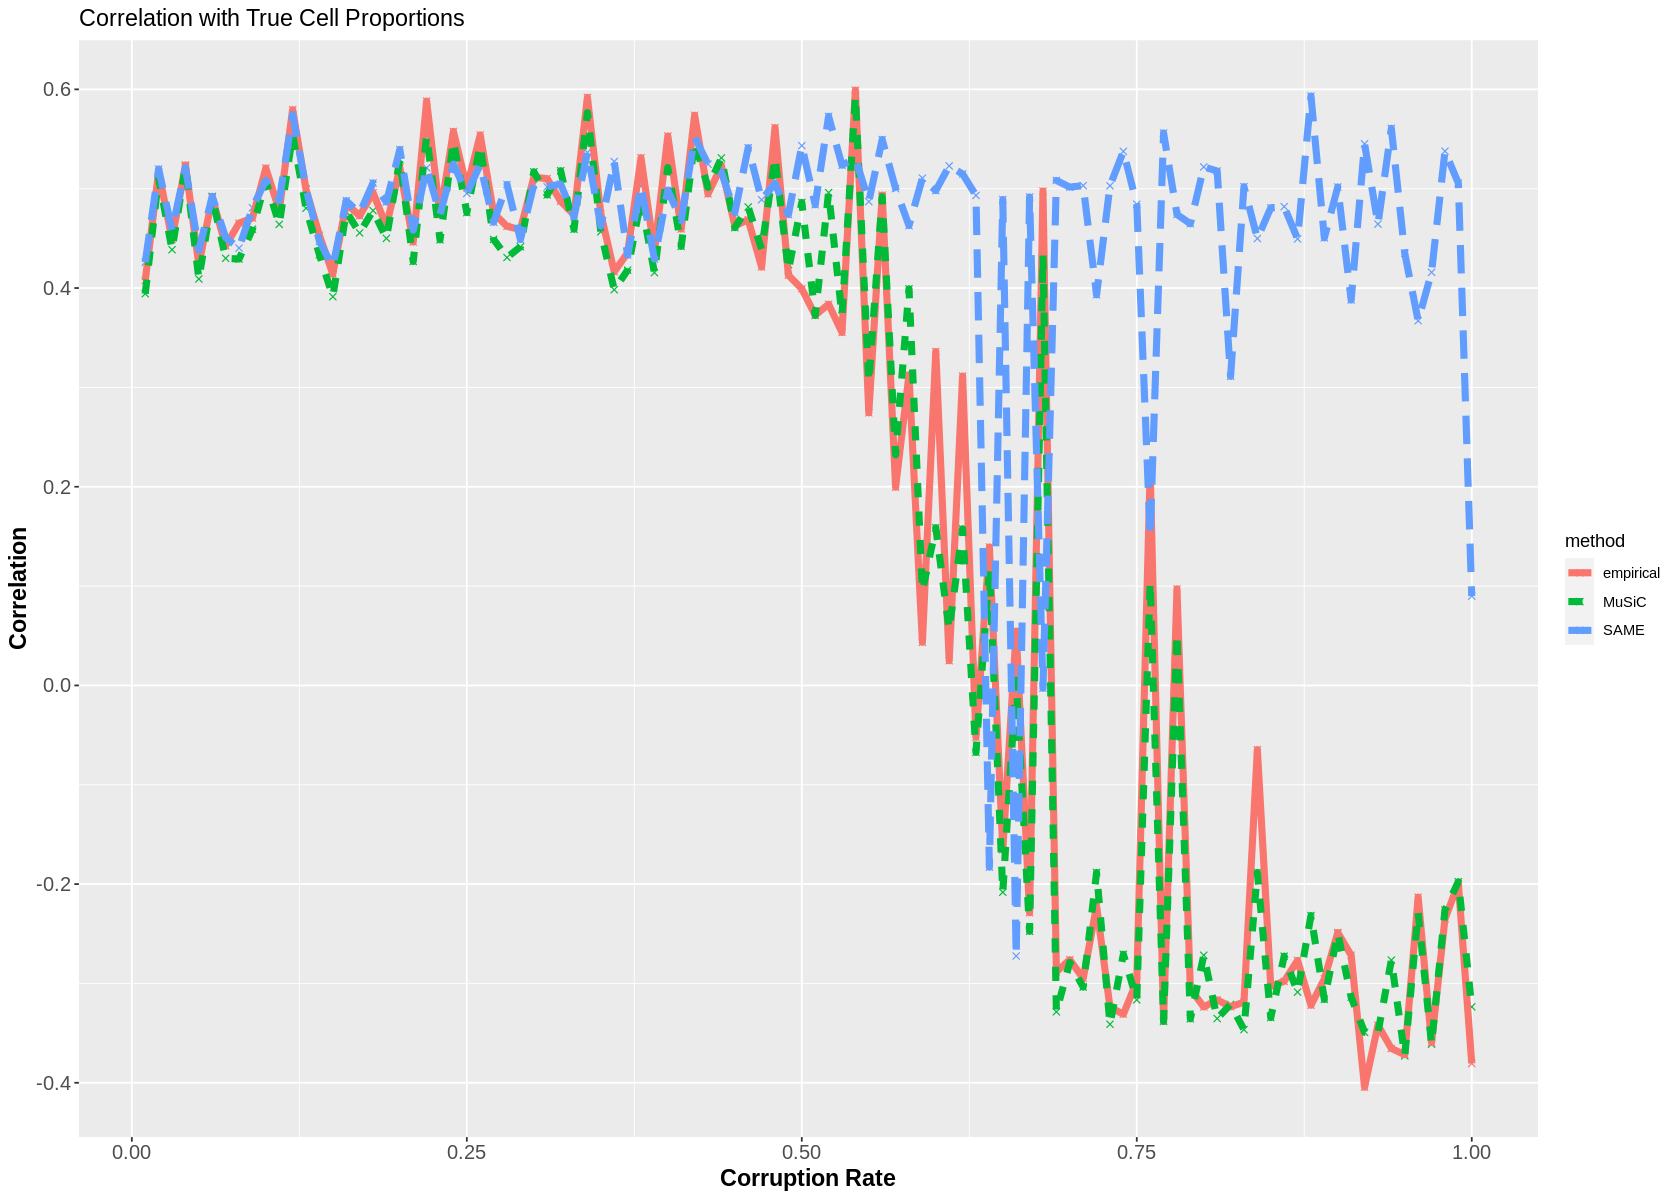

In [45]:
ggplot(dat, aes(corrupt_pi,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Corruption Rate", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [11]:
tbl <- lapply(c(1:7),function(idx) 
    data.frame('Estmated_Gamma' = as.vector(summary.info$est_gamma[[10*(idx-1)+1]]),
               "True_Gamma" = as.vector(summary.info$true_gamma[[10*(idx-1)+1]]),
               "corrupt" = rep((idx-1)*0.1,4000)))
tbl <- Reduce(rbind, tbl)

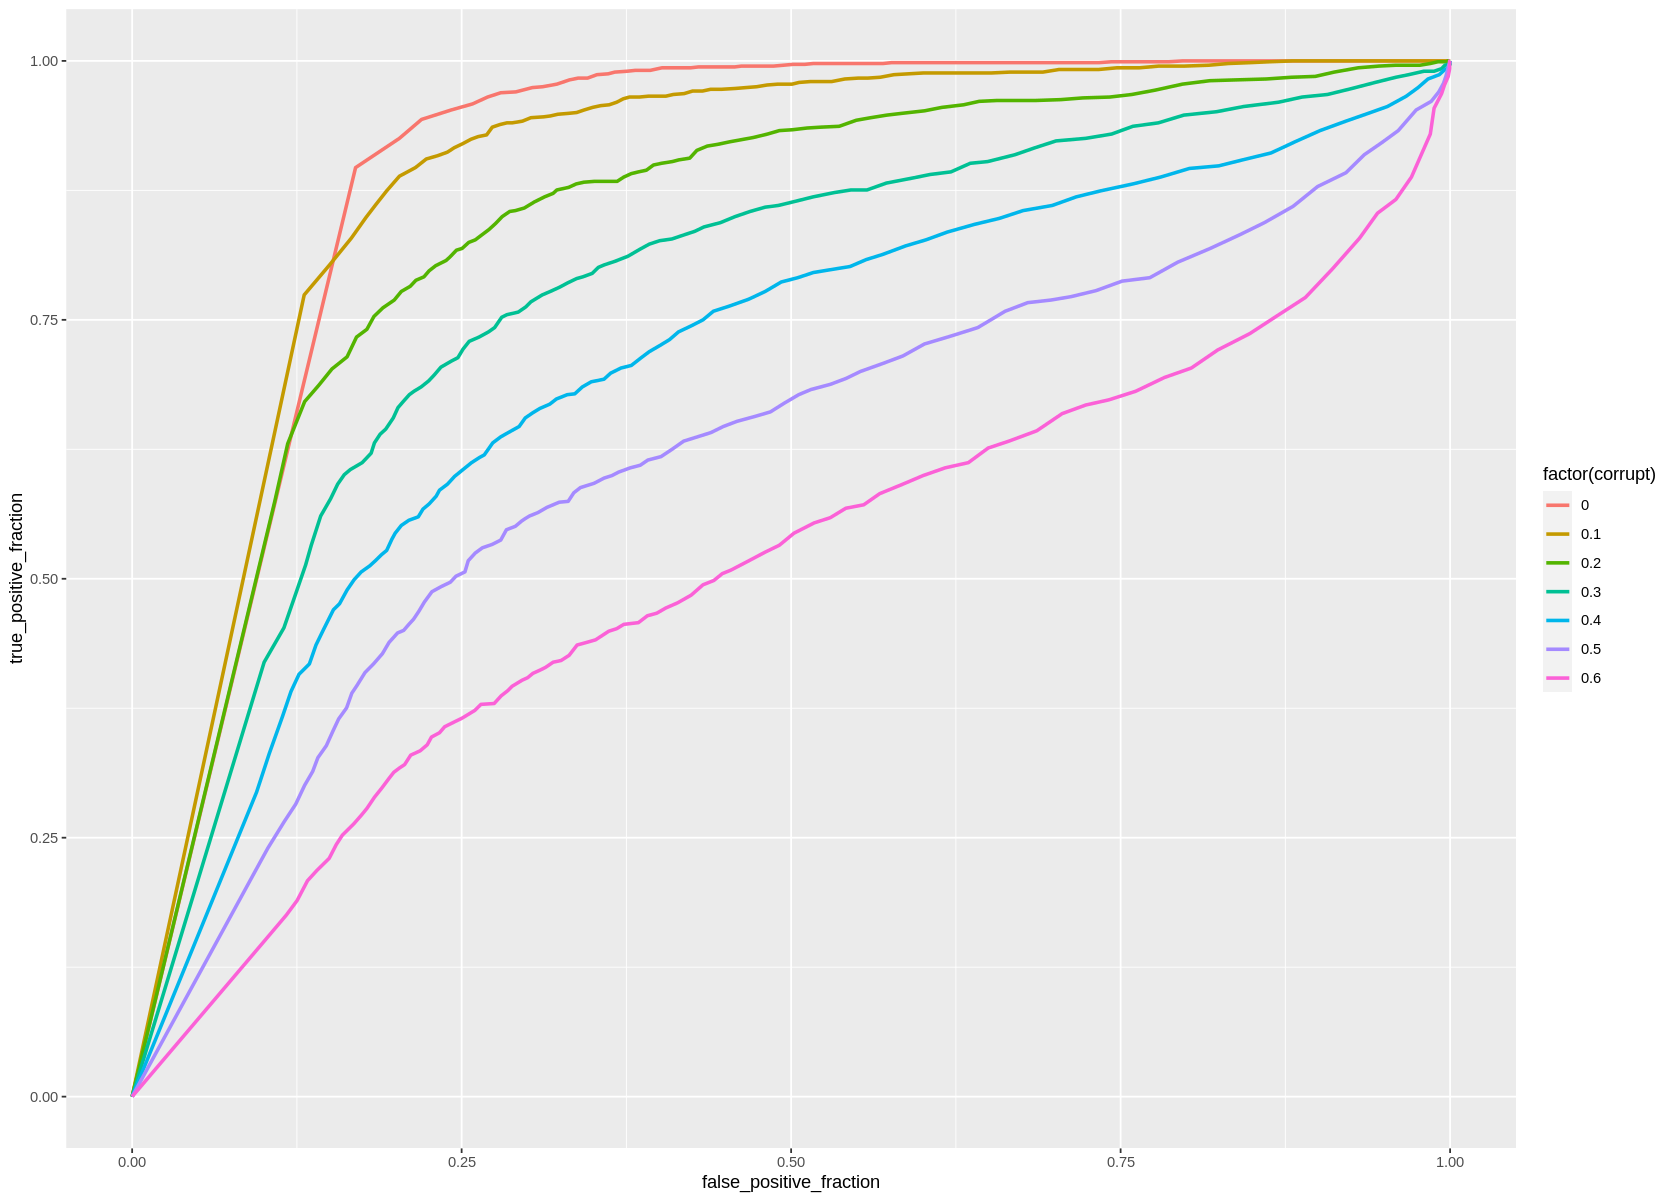

In [12]:
ggplot(tbl, aes(d=True_Gamma,m=Estmated_Gamma,color=factor(corrupt)))+geom_roc(n.cuts = 0)

In [50]:
i=21
scatter.df <- data.frame(tranSig = as.vector(summary.info$z_tranSig[[i]]),
                         music = as.vector(summary.info$z_music[[i]]),
                         empirical = as.vector(summary.info$z_empirical[[i]]),
                         true = as.vector(summary.info$z_true[[i]]),
                         celltype = rep(paste0('celltype',c(1:8)),each = 200))

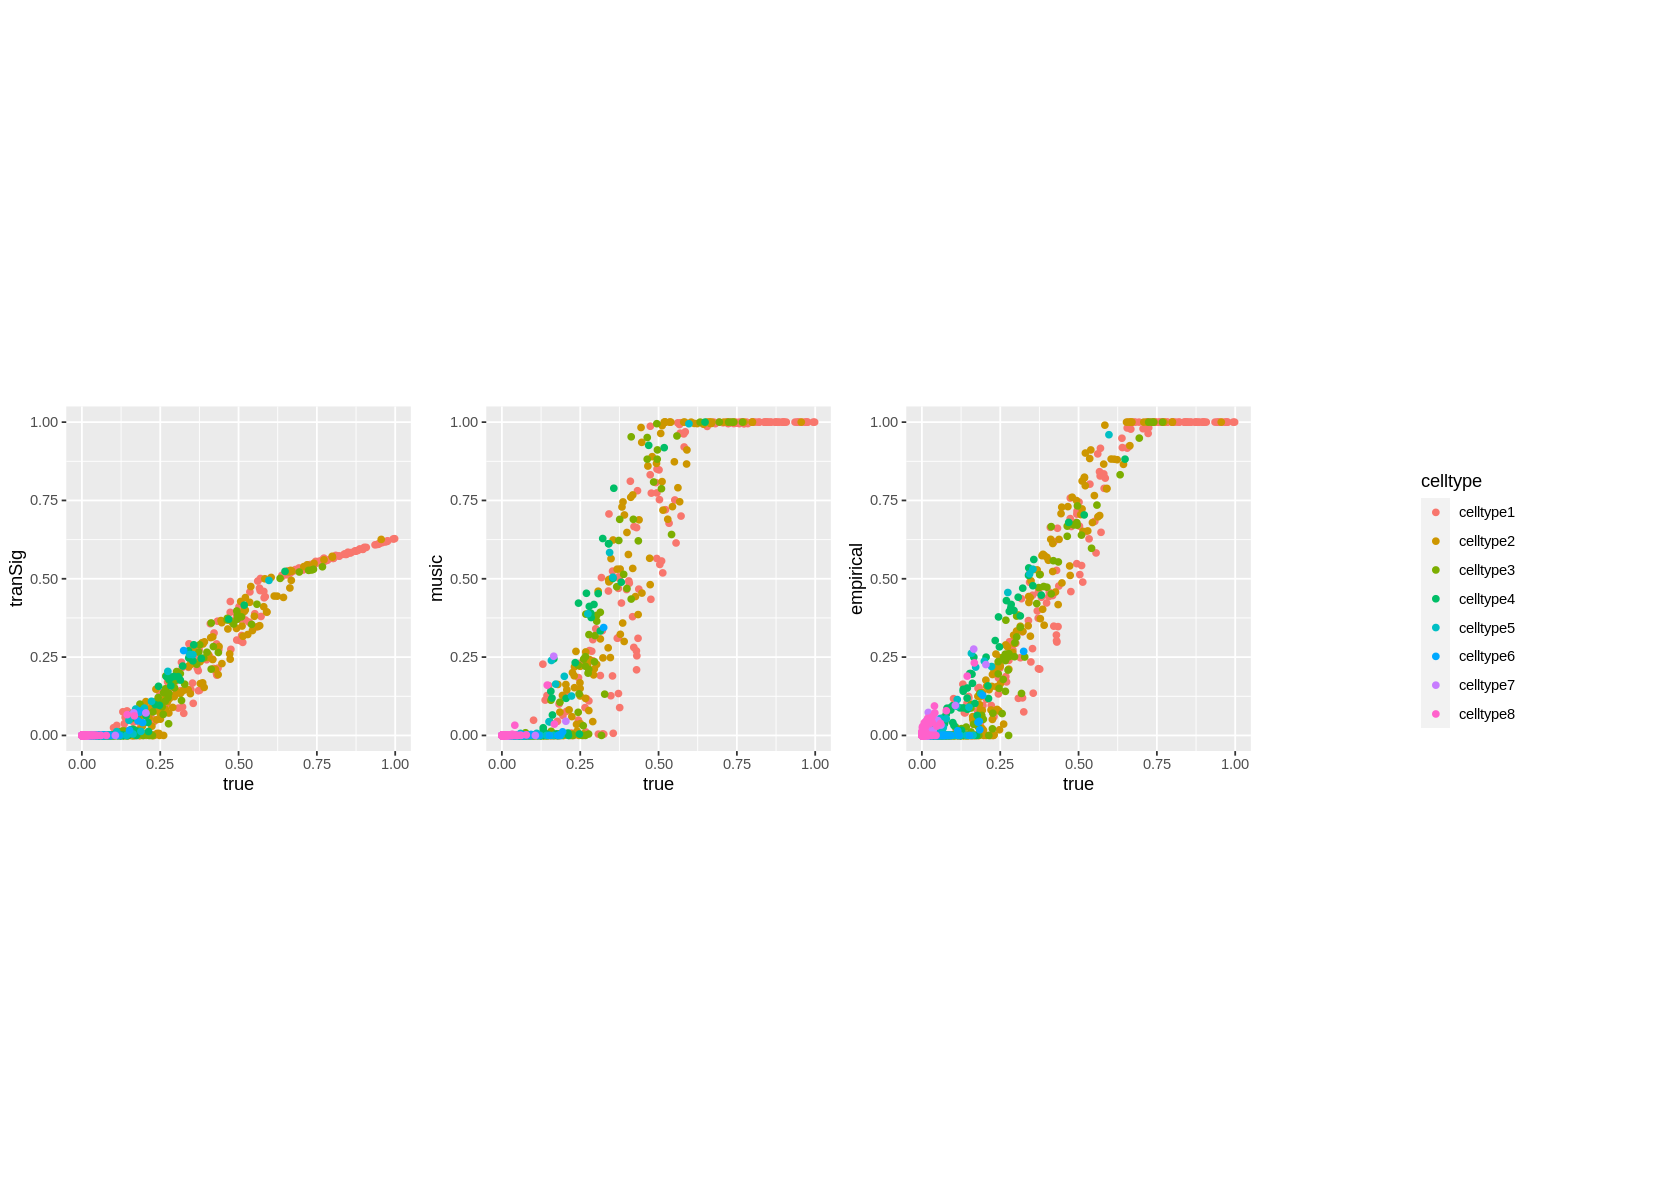

In [51]:
p <- list()
p[[1]]<-ggplot(scatter.df, aes(x=true, y = tranSig, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1) 
p[[2]]<-ggplot(scatter.df, aes(x=true, y = music, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1)+theme(legend.position="none")
p[[3]]<-ggplot(scatter.df, aes(x=true, y = empirical, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1)+theme(legend.position="none")
legend <- get_legend(p[[1]])
p[[1]] <- p[[1]] + theme(legend.position="none")


pll <- grid.arrange(p[[1]],p[[2]],p[[3]],legend,ncol=4)

In [54]:
## tissue number
#files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "rst.T=*", full.names = TRUE)
#files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "rst_frac.*", full.names = TRUE)
#files_corrupt0.6 = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "*corrupt=0.25.tauW*", full.names = TRUE)
#files_rst <- intersect(files_rst, files_corrupt0.6)
#files_rst_frac <- intersect(files_rst_frac, files_corrupt0.6)


files_same_input = list.files(path = '/gpfs/ysm/scratch60/cpsc424/wd262/sc_immune/simulation/tissue_number',pattern = "*", full.names = TRUE)
tissue_number_list <- sapply(files_same_input, basename)
files_same_input = as.vector(sapply(files_same_input, function(file) paste0(file,'/',c(101:115),'/raw_same_input.rds')))

names(tissue_number_list) <- NULL
tissue_number_list <- as.numeric(tissue_number_list)
#tissue_number_list <- sort(tissue_number_list)
tissue_number_list <- rep(tissue_number_list,each=15)

In [56]:
#files_rst = files_rst[sapply(files_rst,function(file) grepl("seed=", file, fixed = TRUE))]
#files_rst_frac = files_rst_frac[sapply(files_rst_frac,function(file) grepl("seed=", file, fixed = TRUE))]

In [55]:
files_rst <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=",
                    tissue_number_list,".D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")
files_rst_frac <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst_frac.T=",
                    tissue_number_list,".D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")

In [58]:
idx <- which(tissue_number_list<=30)
tissue_number_list <- tissue_number_list[idx]
files_same_input <- files_same_input[idx]
files_rst <- files_rst[idx]
files_rst_frac <- files_rst_frac[idx]

In [54]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tissue_number.corrupt=0.6.rds")

In [5]:
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tissue_number.corrupt=0.6.rds")

In [56]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=28.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=109.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst_frac.T=28.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=109.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=29.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=110.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst_frac.T=29.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=110.rds', probable reason 'No

In [57]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tissue_number.corrupt=0.25.rds")

In [49]:
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tissue_number.corrupt=0.25.rds")

In [58]:
tissue_number_list <- tissue_number_list[-summary.info$delete.idx]

In [59]:
n <- length(tissue_number_list) 
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 tissue_number_list = rep(tissue_number_list,3),
                 method = c(rep("tranSig",n),rep("MuSiC",n),rep("empirical",n)))



In [21]:
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

In [60]:
dat.summary <- data_summary(dat, varname="cor", 
                    groupnames=c("tissue_number_list", "method"))

In [24]:
head(dat.summary)

,tissue_number_list,method,cor,sd
,<dbl>,<fct>,<dbl>,<dbl>
1,3,empirical,0.3645830,0.3616468
2,3,MuSiC,0.4164390,0.3495394
3,3,SAME,0.8402329,0.1315881
4,4,empirical,0.3645830,0.3616468
5,4,MuSiC,0.4164390,0.3495394
6,4,SAME,0.7989658,0.2091468


In [39]:
head(dat)

,cor,tissue_number_list,method
,<dbl>,<dbl>,<fct>
1,0.9258941,10,SAME
2,0.8552051,10,SAME
3,0.7481493,10,SAME
4,0.6198126,10,SAME
5,0.8478631,10,SAME
6,0.9082318,10,SAME


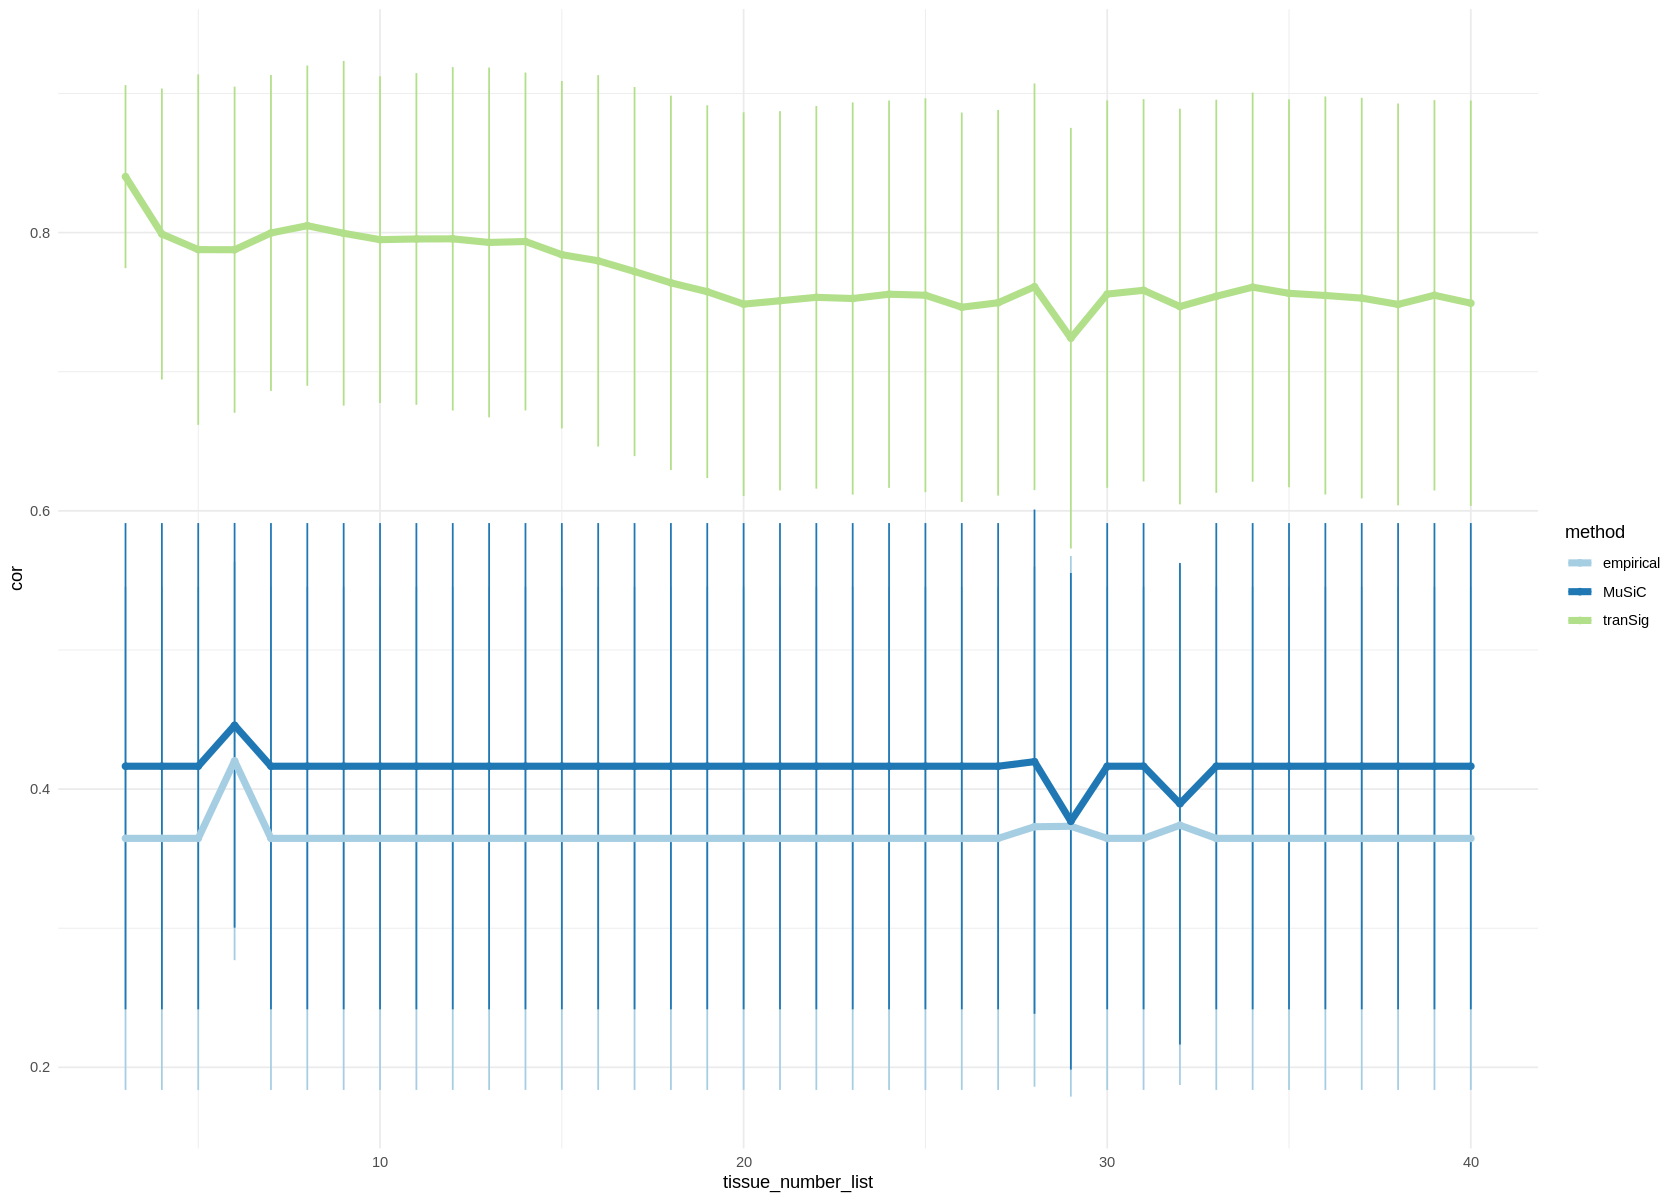

In [61]:
ggplot(dat.summary, aes(x=tissue_number_list, y=cor, group=method, color=method)) + 
    geom_errorbar(aes(ymin=cor-0.5*sd, ymax=cor+0.5*sd), width=0,size=.5) +
    geom_line(size=2) + geom_point()+
   scale_color_brewer(palette="Paired")+theme_minimal()

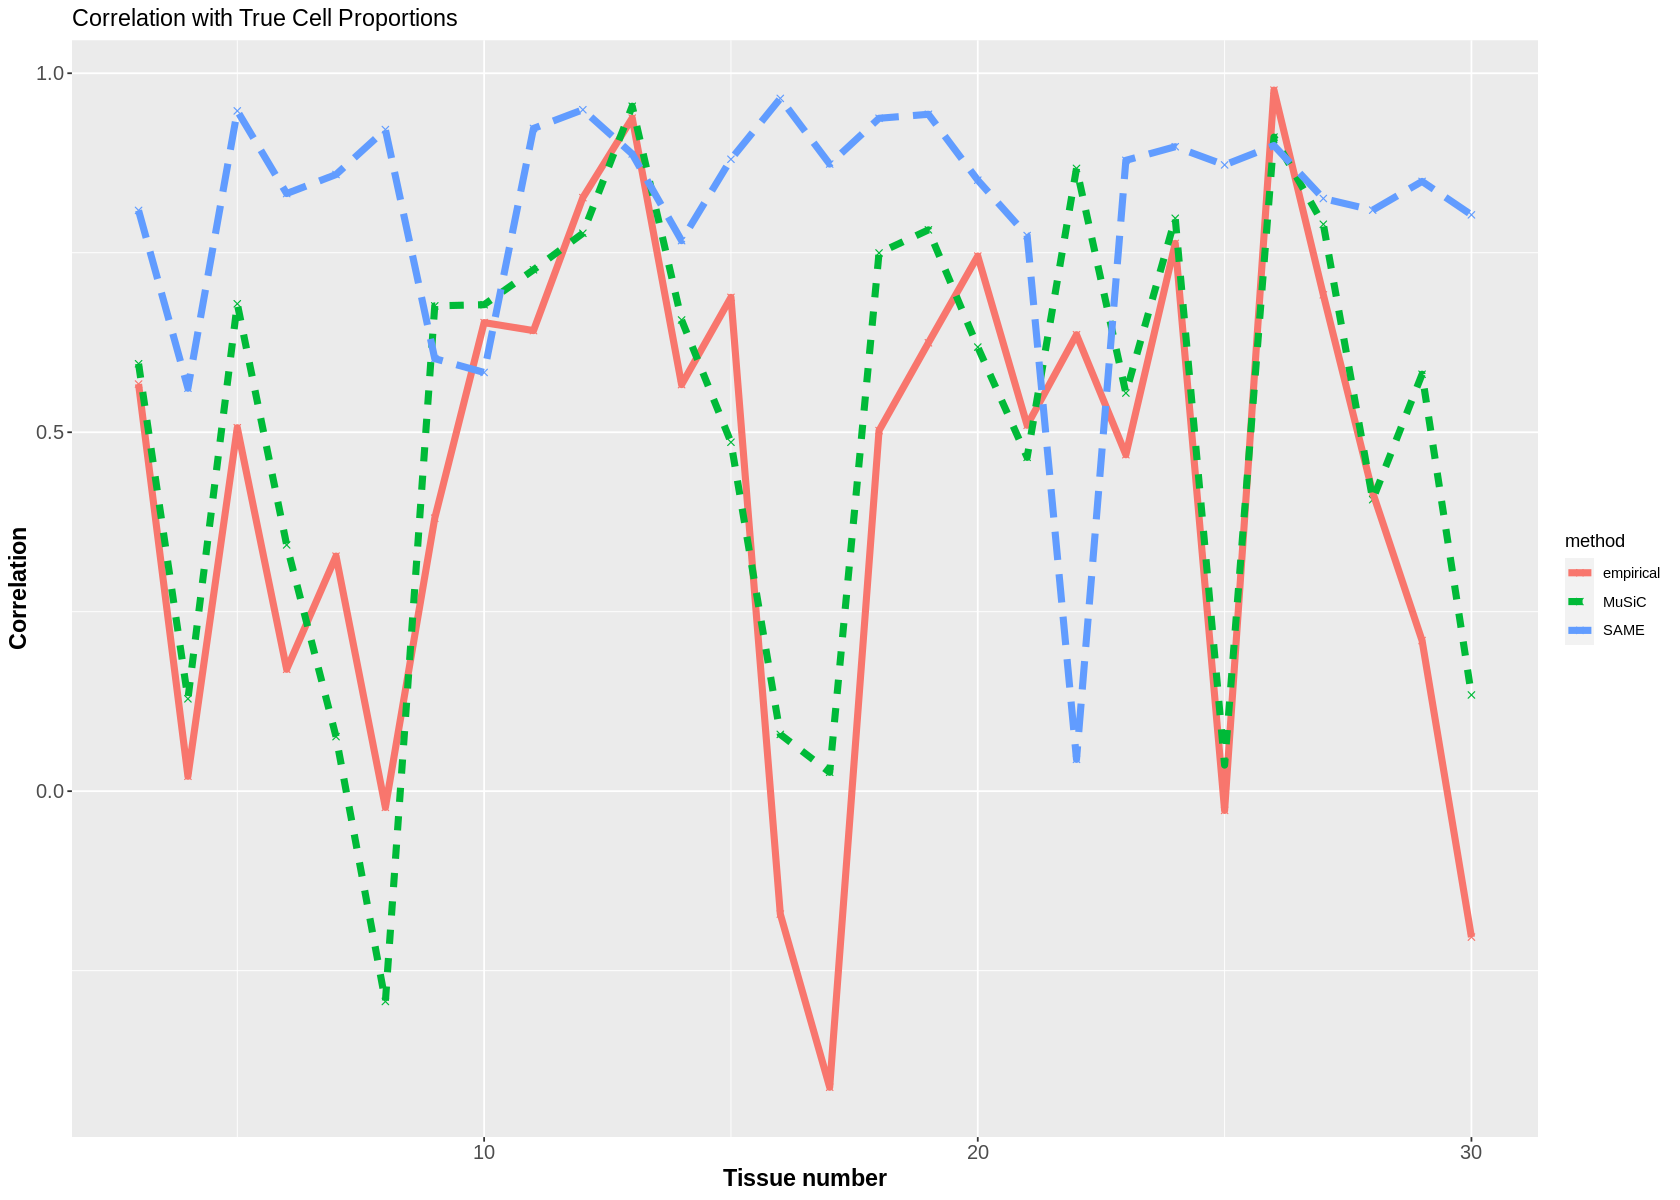

In [89]:
ggplot(dat.summary, aes(tissue_number_list,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Tissue number", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [28]:
tbl <- lapply(seq(length(tissue_number_list)),function(idx) 
    data.frame('Estmated_Gamma' = as.vector(summary.info$est_gamma[[idx]]),
               "True_Gamma" = as.vector(summary.info$true_gamma[[idx]]),
               "corrupt" = rep(tissue_number_list[idx],length(as.vector(summary.info$est_gamma[[idx]])))))
tbl <- Reduce(rbind, tbl)

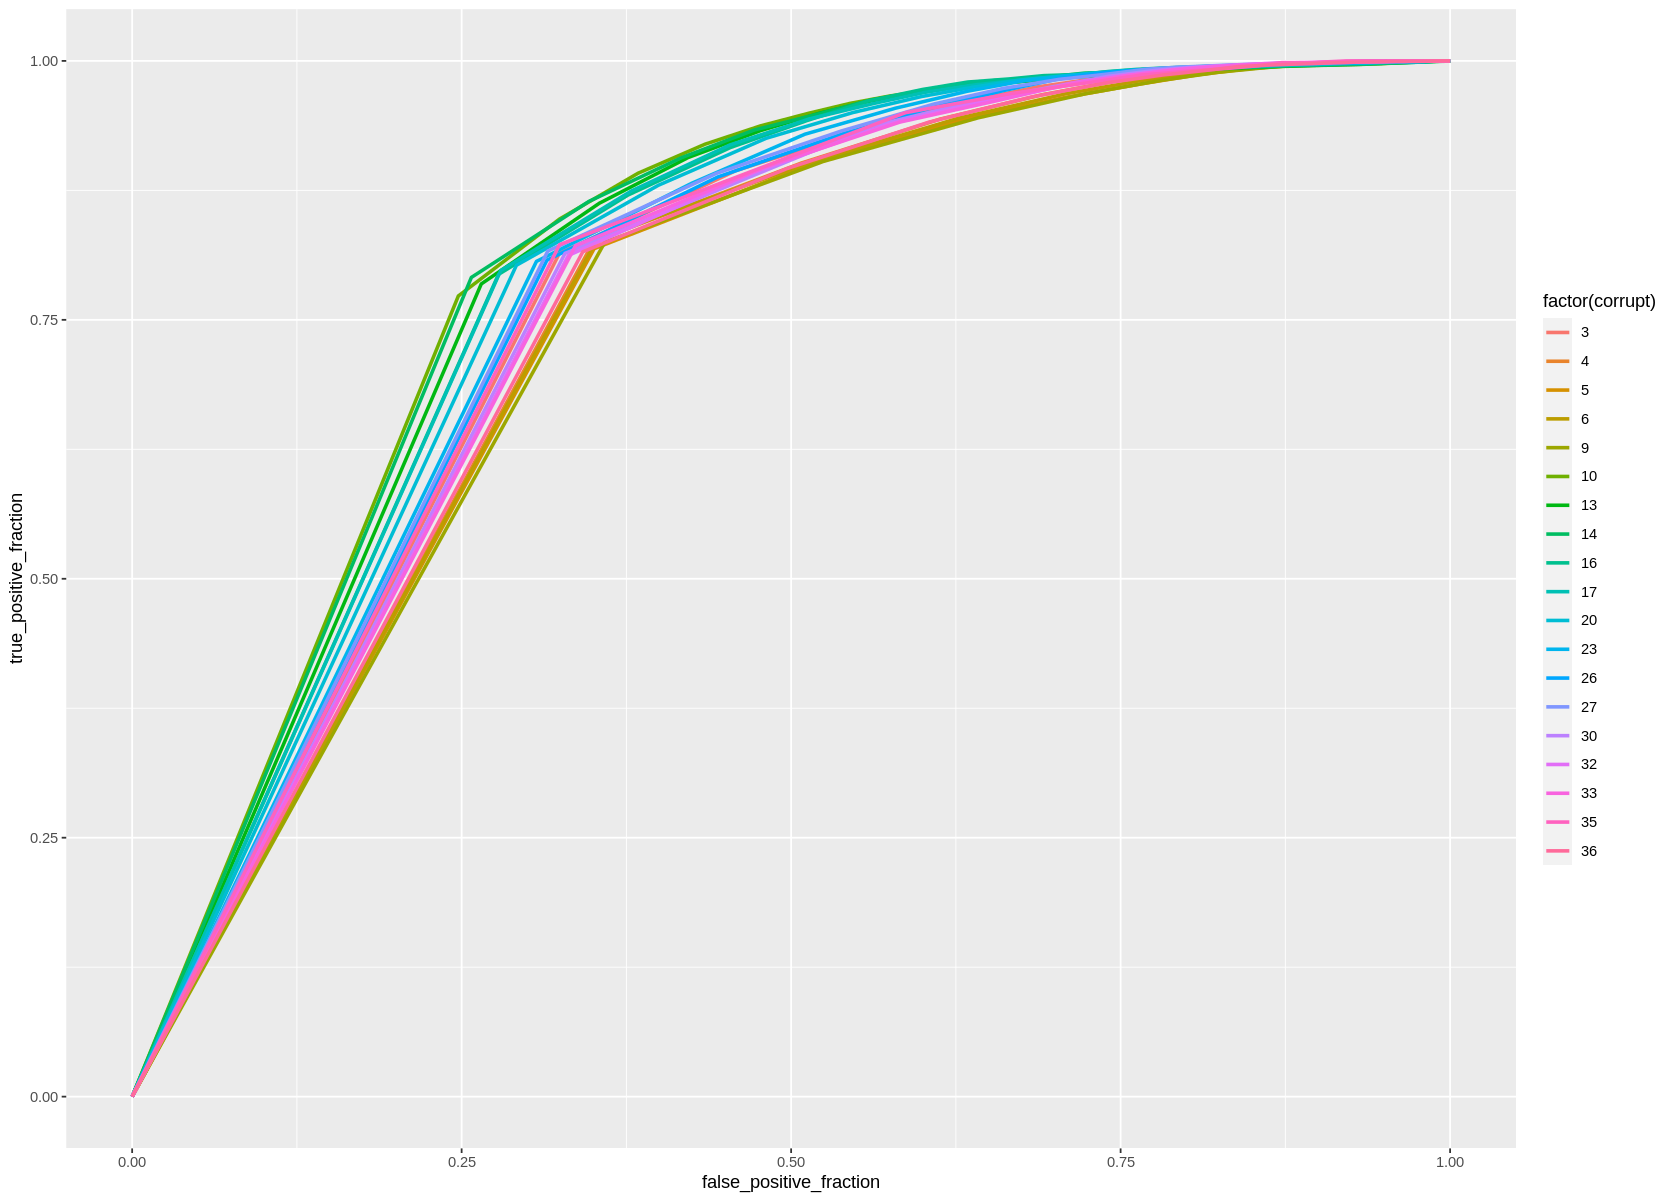

In [29]:
ggplot(tbl, aes(d=True_Gamma,m=Estmated_Gamma,color=factor(corrupt)))+geom_roc(n.cuts = 0)

In [28]:
## gene number


files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "rst.T=*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "rst_frac.*", full.names = TRUE)
files_corrupt0.6 = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "*corrupt=0.25.tauW*", full.names = TRUE)
files_rst <- intersect(files_rst, files_corrupt0.6)
files_rst_frac <- intersect(files_rst_frac, files_corrupt0.6)




In [29]:
get_gene_number <- function(file){
    x = strsplit(file, split='=')[[1]][3]
    x = substr(x,1,nchar(x)-2)
    return(as.numeric(x))
}
gene_number_list <- sapply(files_rst,get_gene_number)
names(gene_number_list) <- NULL

In [30]:
#files_same_input = list.files(path = '/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number',pattern = "*", full.names = TRUE)

files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number/',gene_number_list,'/raw_same_input.rds')


In [23]:
files_input = list.files(path = '/gpfs/ysm/scratch60/cpsc424/wd262/sc_immune/simulation/gene_number',pattern = "*", full.names = TRUE)
gene_number_list <- sapply(files_input, basename)
files_same_input = as.vector(sapply(files_input, function(file) paste0(file,'/',c(101:115),'/raw_same_input.rds')))
files_X1 = as.vector(sapply(files_input, function(file) paste0(file,'/',c(101:115),'/X_1.rds')))
files_Y0 = as.vector(sapply(files_input, function(file) paste0(file,'/',c(101:115),'/Y0.txt')))
                                    
names(gene_number_list) <- NULL
gene_number_list <- as.numeric(gene_number_list)
#tissue_number_list <- sort(tissue_number_list)
gene_number_list <- rep(gene_number_list,each=15)

In [4]:
files_rst <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst.T=5.D=",
                    gene_number_list,".K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")
files_rst_frac <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst_frac.T=5.D=",
                    gene_number_list,".K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")

In [40]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst.T=5.D=1650.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=104.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst_frac.T=5.D=1650.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=104.rds', probable reason 'No such file or directory'”


[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340
[1] 341
[1] 342
[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349
[1] 350
[1] 351
[1] 352
[1] 353
[1] 354
[1] 355
[1] 356
[1] 357
[1] 358
[1] 359
[1] 360
[1] 361
[1] 362
[1] 363
[1] 364
[1] 365
[1] 366
[1] 367
[1] 368
[1] 369
[1] 370
[1] 371
[1] 372
[1] 373
[1] 374
[1] 375
[1] 376
[1] 377
[1] 378
[1] 379
[1] 380
[1] 381
[1] 382
[1] 383
[1] 384
[1] 385
[1] 386
[1] 387
[1] 388
[1] 389
[1] 390
[1] 391
[1] 392
[1] 393
[1] 394
[1] 395
[1] 396
[1] 397
[1] 398
[1] 399
[1] 400
[1] 401
[1] 402
[1] 403
[1] 404
[1] 405
[1] 406
[1] 407
[1] 408
[1] 409
[1] 410
[1] 411
[1] 412
[1] 413
[1] 414
[1] 415
[1] 416
[1] 417
[1] 418
[1] 419
[1] 420
[1] 421
[1] 422
[1] 423
[1] 424
[1] 425
[1] 426
[1] 427
[1] 428
[1] 429
[1] 430
[1] 431
[1] 432
[1] 433
[1] 434
[1] 435
[1] 436
[1] 437
[1] 438
[1] 439
[1] 440
[1] 441
[1] 442
[1] 443
[1] 444
[1] 445
[1] 446
[1] 447
[1] 448
[1] 449
[1] 450
[1] 451
[1] 452
[1] 453
[1] 454
[1] 455
[1] 456
[1] 457
[1] 458
[1] 459


In [47]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.gene_number.corrupt=0.25.rds")

In [62]:
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.gene_number.corrupt=0.25.rds")

In [41]:
gene_number_list <- gene_number_list[-summary.info$delete.idx]

In [64]:
n <- length(gene_number_list) 
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 gene_number_list = rep(gene_number_list,3),
                 method = c(rep("tranSig",n),rep("MuSiC",n),rep("empirical",n)))

In [65]:
dat.summary <- data_summary(dat, varname="cor", 
                    groupnames=c("gene_number_list", "method"))

In [44]:
head(dat.summary)

,gene_number_list,method,cor,sd
,<dbl>,<fct>,<dbl>,<dbl>
1,150,empirical,0.3510098,0.4032377
2,150,MuSiC,0.3469537,0.4567626
3,150,SAME,0.7203754,0.2236603
4,180,empirical,0.1454440,0.3835831
5,180,MuSiC,0.1887835,0.3777089
6,180,SAME,0.7985076,0.1370961


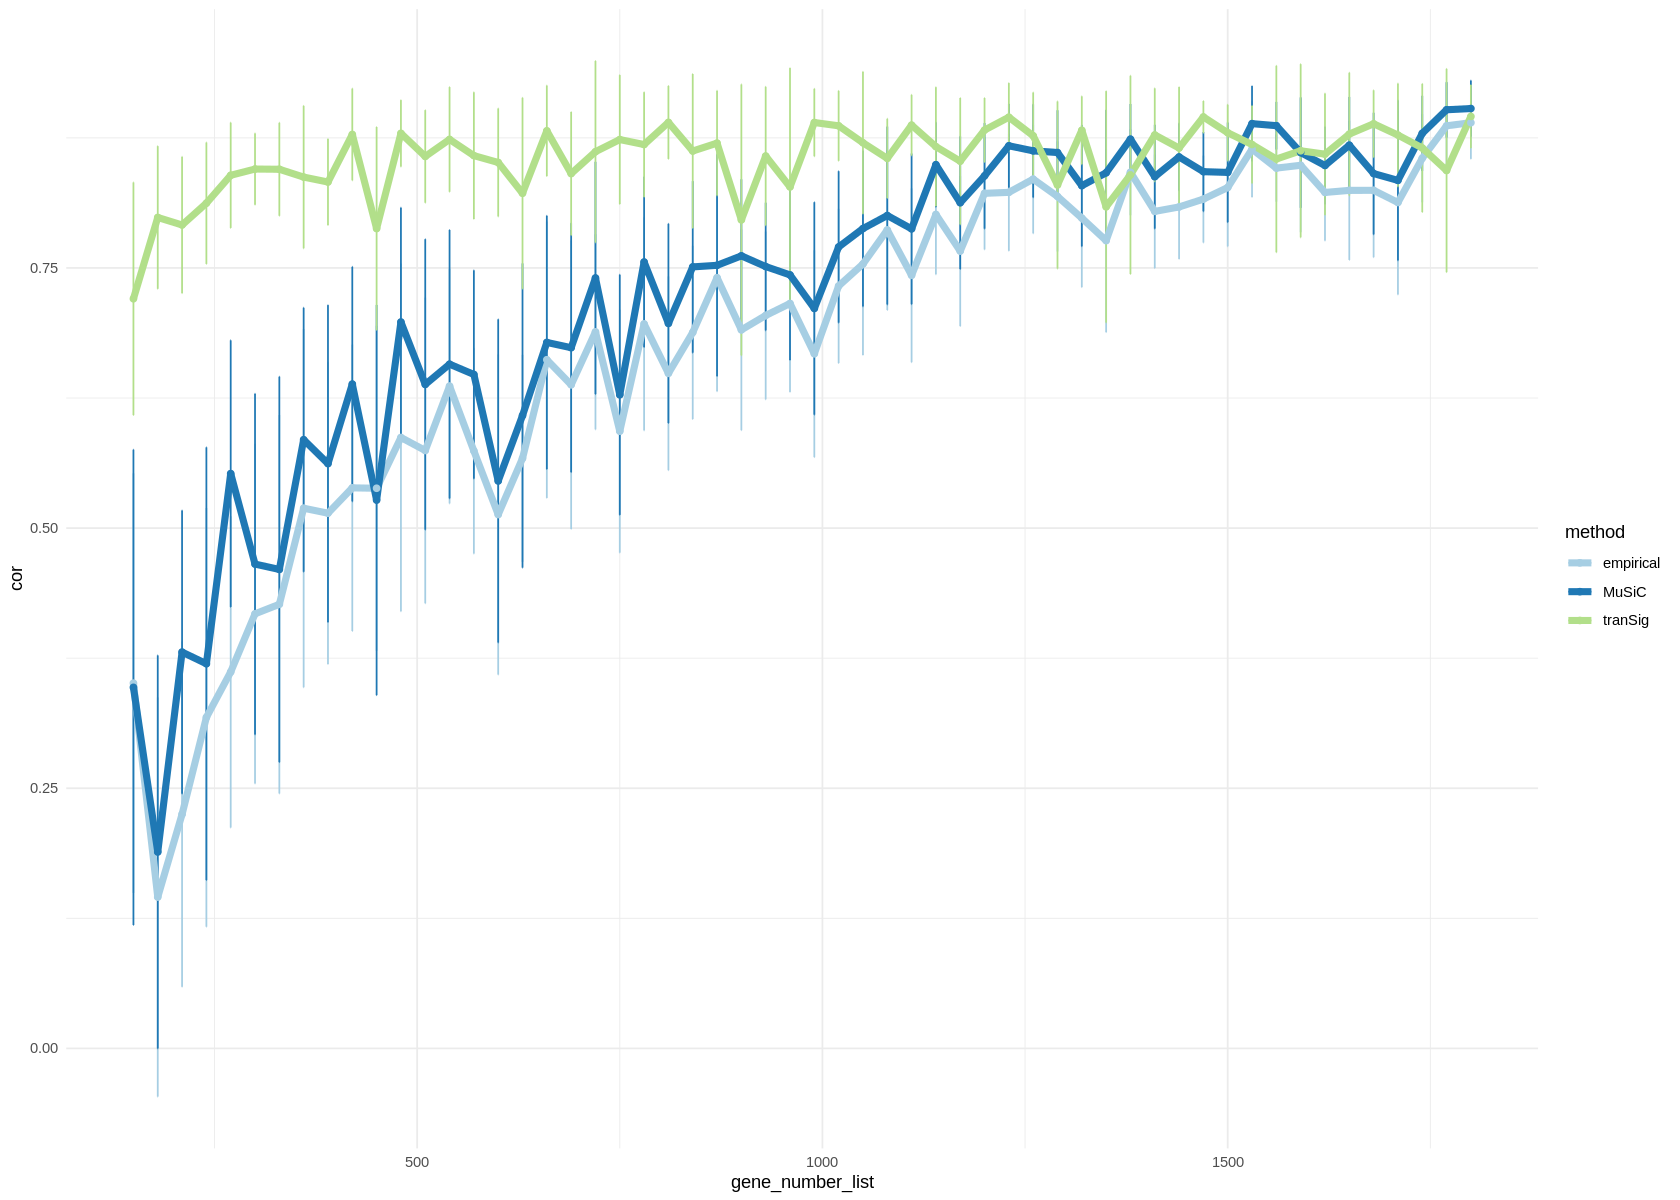

In [66]:
ggplot(dat.summary, aes(x=gene_number_list, y=cor, group=method, color=method)) + 
    geom_errorbar(aes(ymin=cor-0.5*sd, ymax=cor+0.5*sd), width=.7,size=.5) +
    geom_line(size=2) + geom_point()+
   scale_color_brewer(palette="Paired")+theme_minimal()

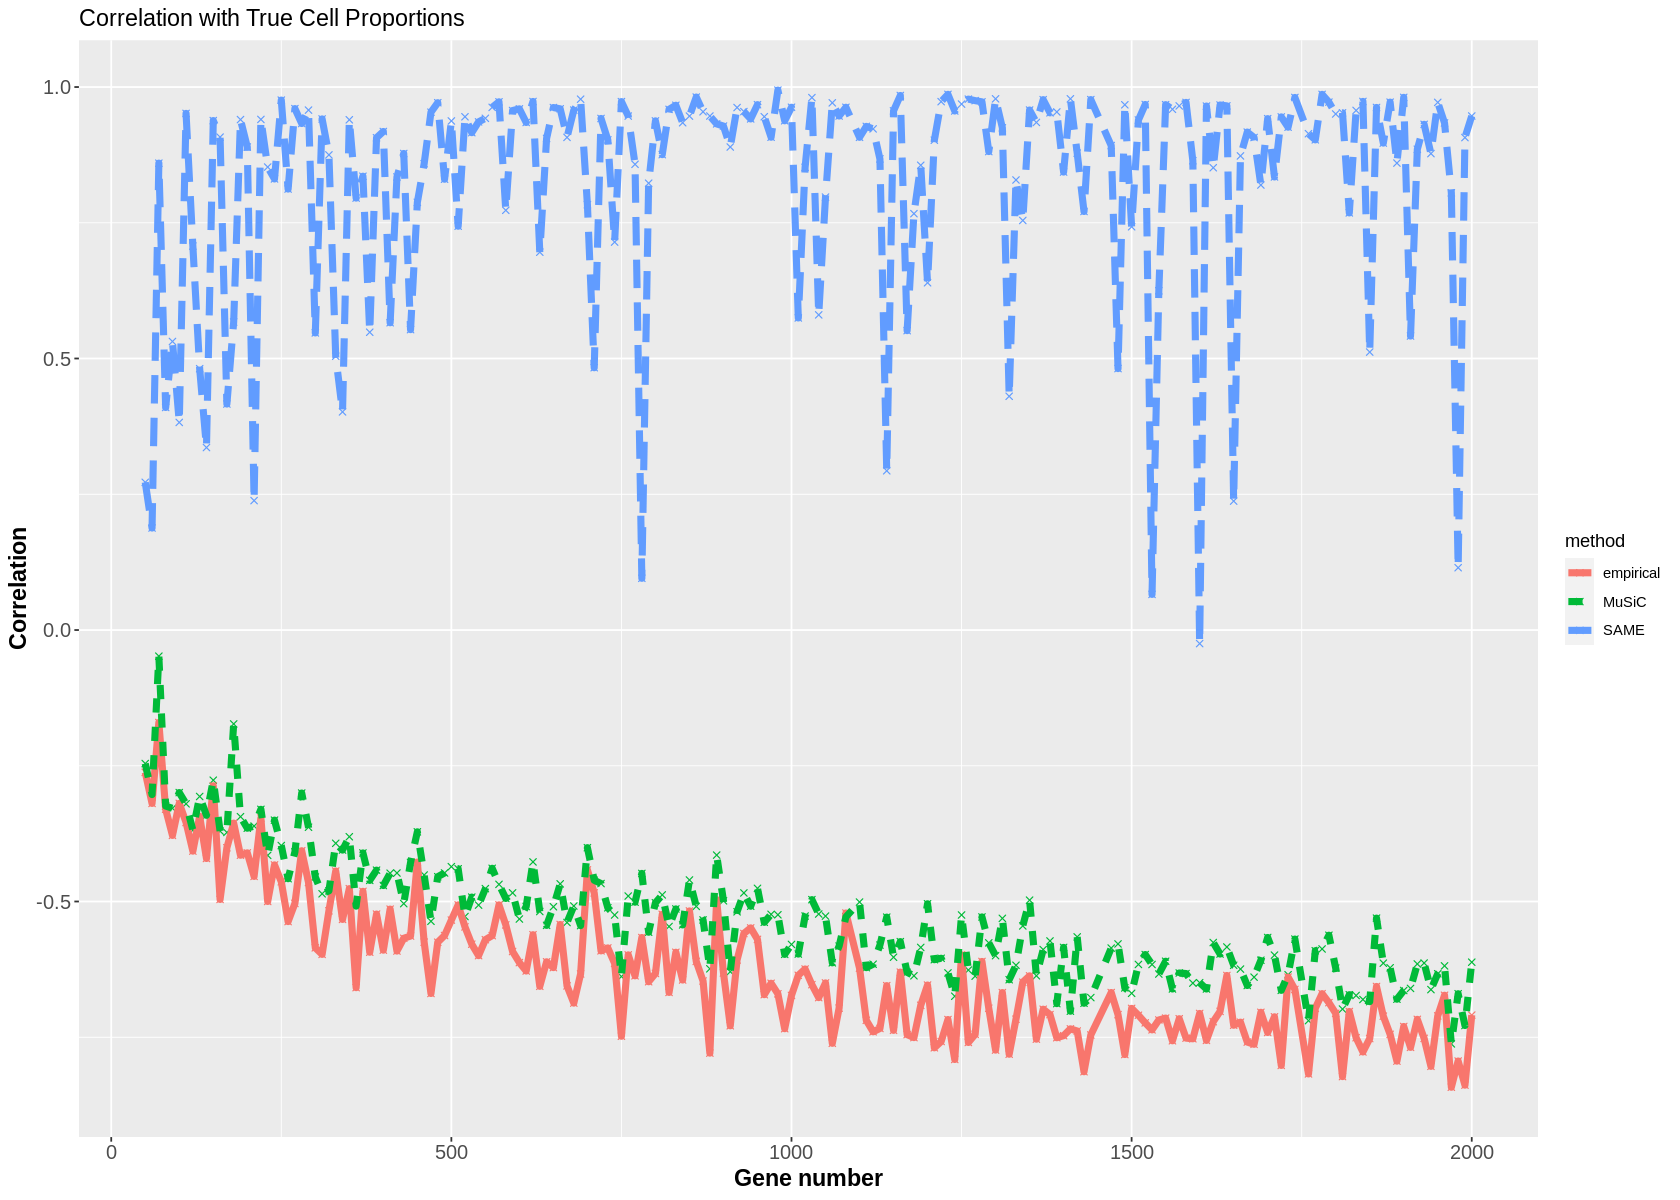

In [20]:


ggplot(dat, aes(gene_number_list,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Gene number", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

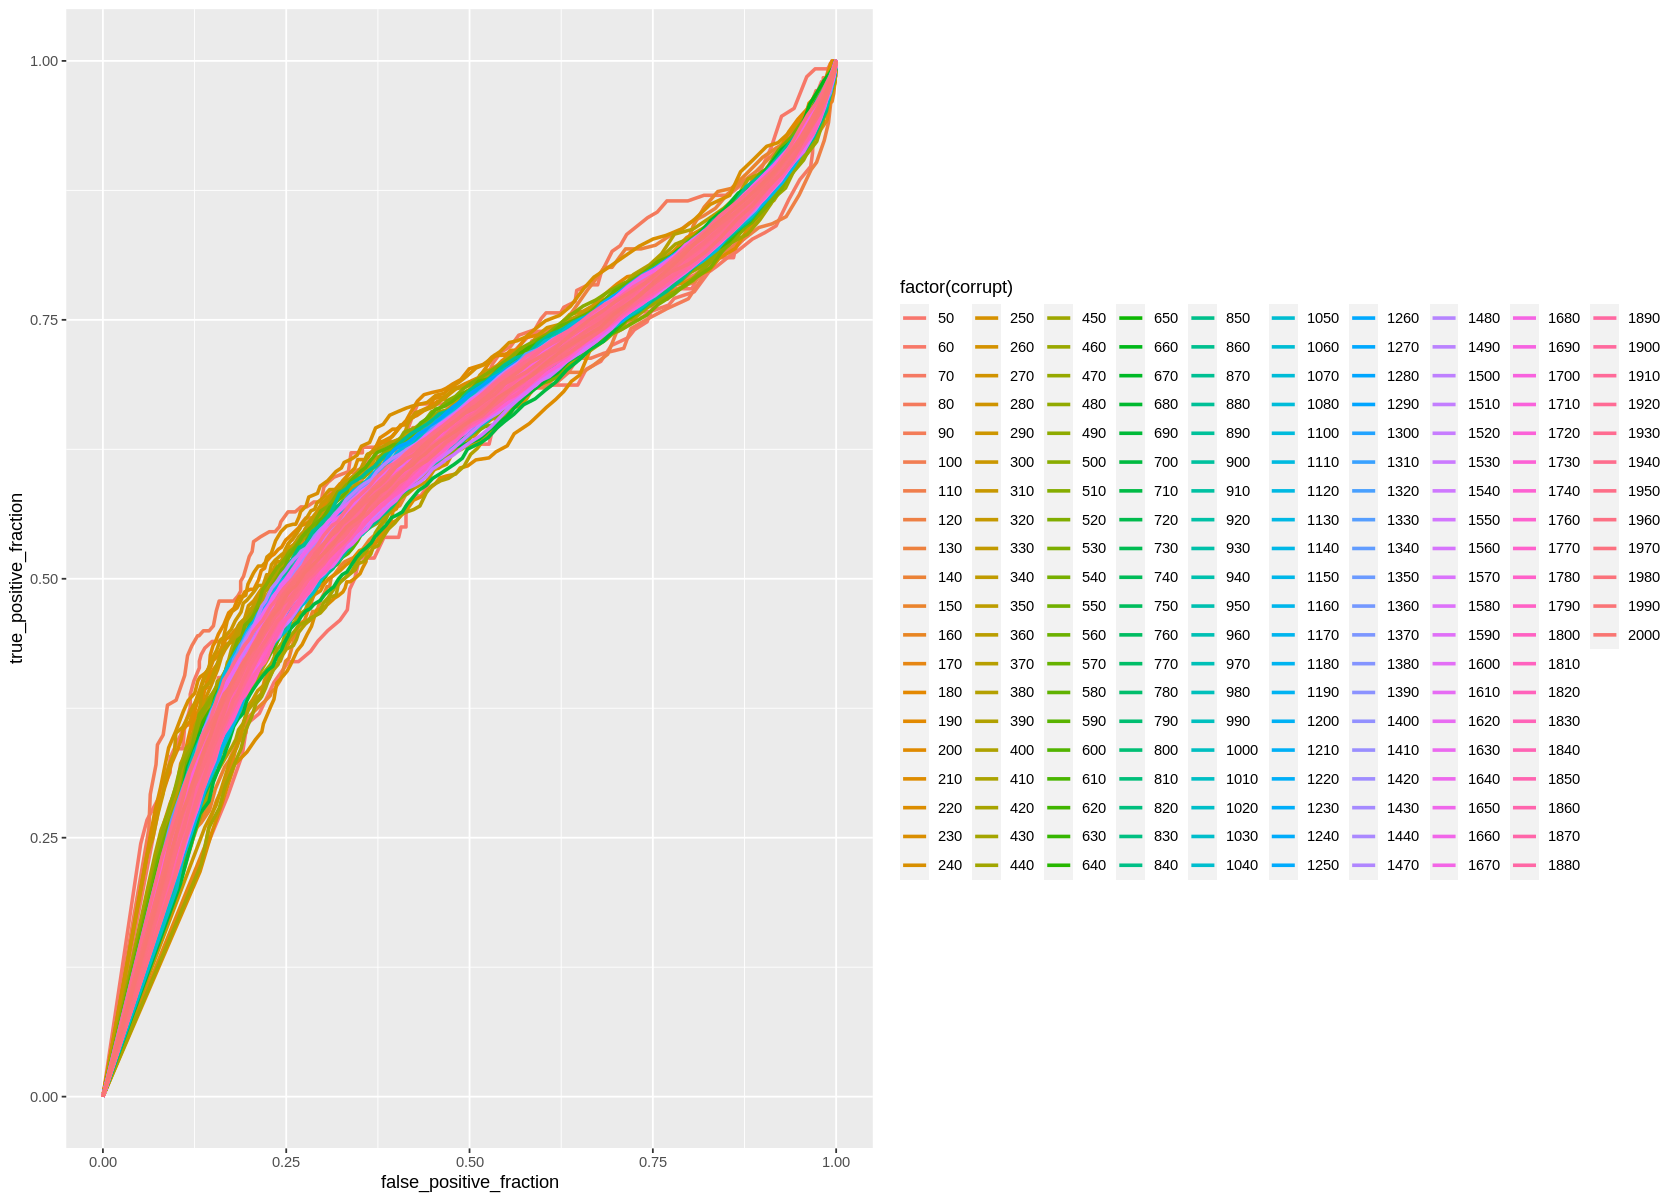

In [21]:
tbl <- lapply(seq(length(gene_number_list)),function(idx) 
    data.frame('Estmated_Gamma' = as.vector(summary.info$est_gamma[[idx]]),
               "True_Gamma" = as.vector(summary.info$true_gamma[[idx]]),
               "corrupt" = rep(gene_number_list[idx],8*gene_number_list[idx])))
tbl <- Reduce(rbind, tbl)
              
ggplot(tbl, aes(d=True_Gamma,m=Estmated_Gamma,color=factor(corrupt)))+geom_roc(n.cuts = 0)              

In [112]:
## pi

files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi',pattern = "rst.T=*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi',pattern = "rst_frac.*", full.names = TRUE)
files_T = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi',pattern = "*.update.pi=TRUE.empirical*", full.names = TRUE)
files_F = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi',pattern = "*.update.pi=FALSE.empirical*", full.names = TRUE)
files_rst_T <- intersect(files_rst, files_T)
files_rst_F <- intersect(files_rst, files_F)
files_rst_T <- intersect(files_rst_frac, files_T)
files_rst_F <- intersect(files_rst_frac, files_F)




In [113]:
get_pi <- function(file){
    x = strsplit(file, split='=')[[1]][10]
    x = substr(x,1,nchar(x)-4)
    return(as.numeric(x))
}
pi_list.T <- sapply(files_rst_T,get_pi)
names(pi_list.T) <- NULL

pi_list.F <- sapply(files_rst_F,get_pi)
names(pi_list.F) <- NULL

[1] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.01.rds"
 [2] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.03.rds"
 [3] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.05.rds"
 [4] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.06.rds"
 [5] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.08.rds"
 [6] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.09.rds"
 [7] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.1.rds" 
 [8] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.11.rds"
 [9] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.12.rds"
[10] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.13.rds"
[11] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.14.rds"
[12] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.15.rds"
[13] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.16.rds"
[14] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.17.rds"
[15] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.18.rds"
[16] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.19.rds"
[17] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.2.rds" 
[18] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.21.rds"
[19] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.22.rds"
[20] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.23.rds"
[21] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.24.rds"
[22] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.25.rds"
[23] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi/rst_frac.T=5.D=500.K=8.corrupt=0.6.tauW=1.tauXdBeta=1.tau_v=0.6.update.pi=TRUE.empirical_pi=0.26.rds"
[24] "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/pi

In [ ]:
files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/pi/',pi_list,'/raw_same_input.rds')


In [ ]:
summary.info.T <- get_summary.info(files_rst_T,files_rst_frac_T,files_same_input)
summary.info.F <- get_summary.info(files_rst_F,files_rst_frac_F,files_same_input)

In [ ]:
saveRDS(summary.info.T,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.empirical_pi.update.pi=TRUE.corrupt=0.6.rds")
saveRDS(summary.info.F,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.empirical_pi.update.pi=FALSE.corrupt=0.6.rds")

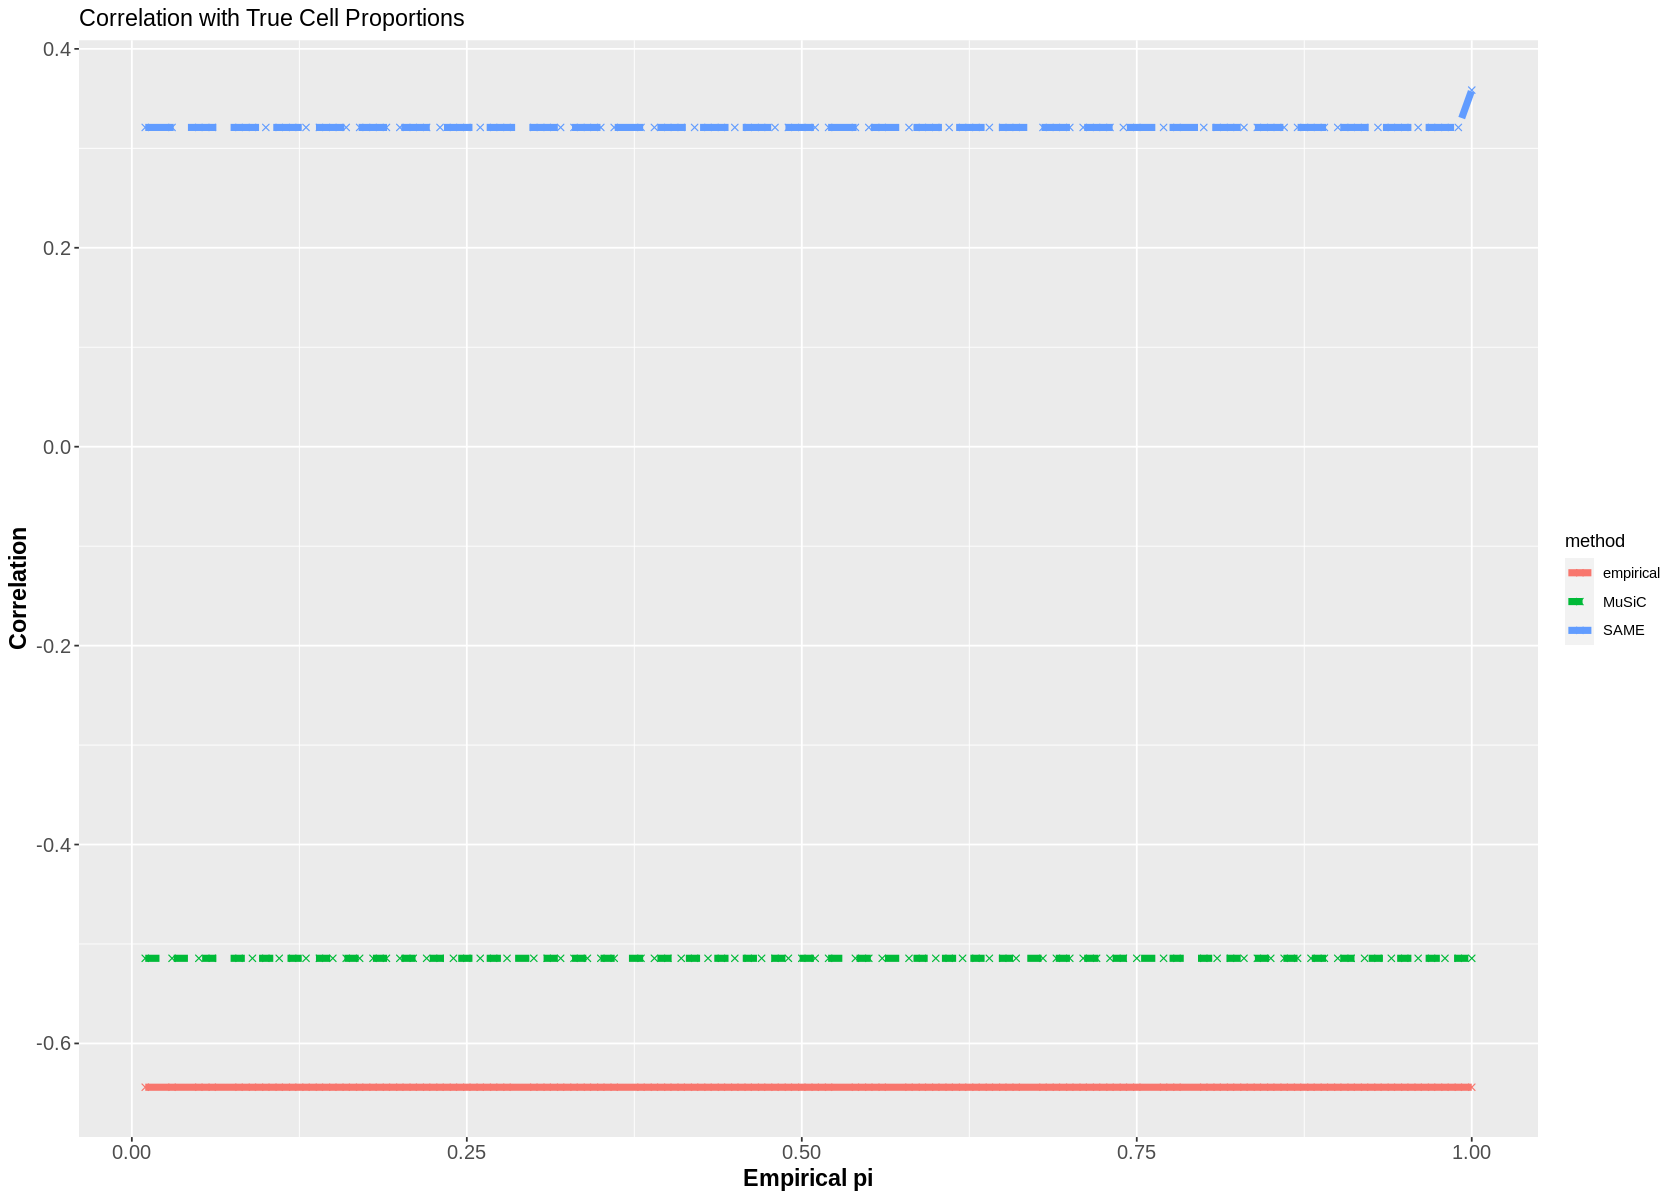

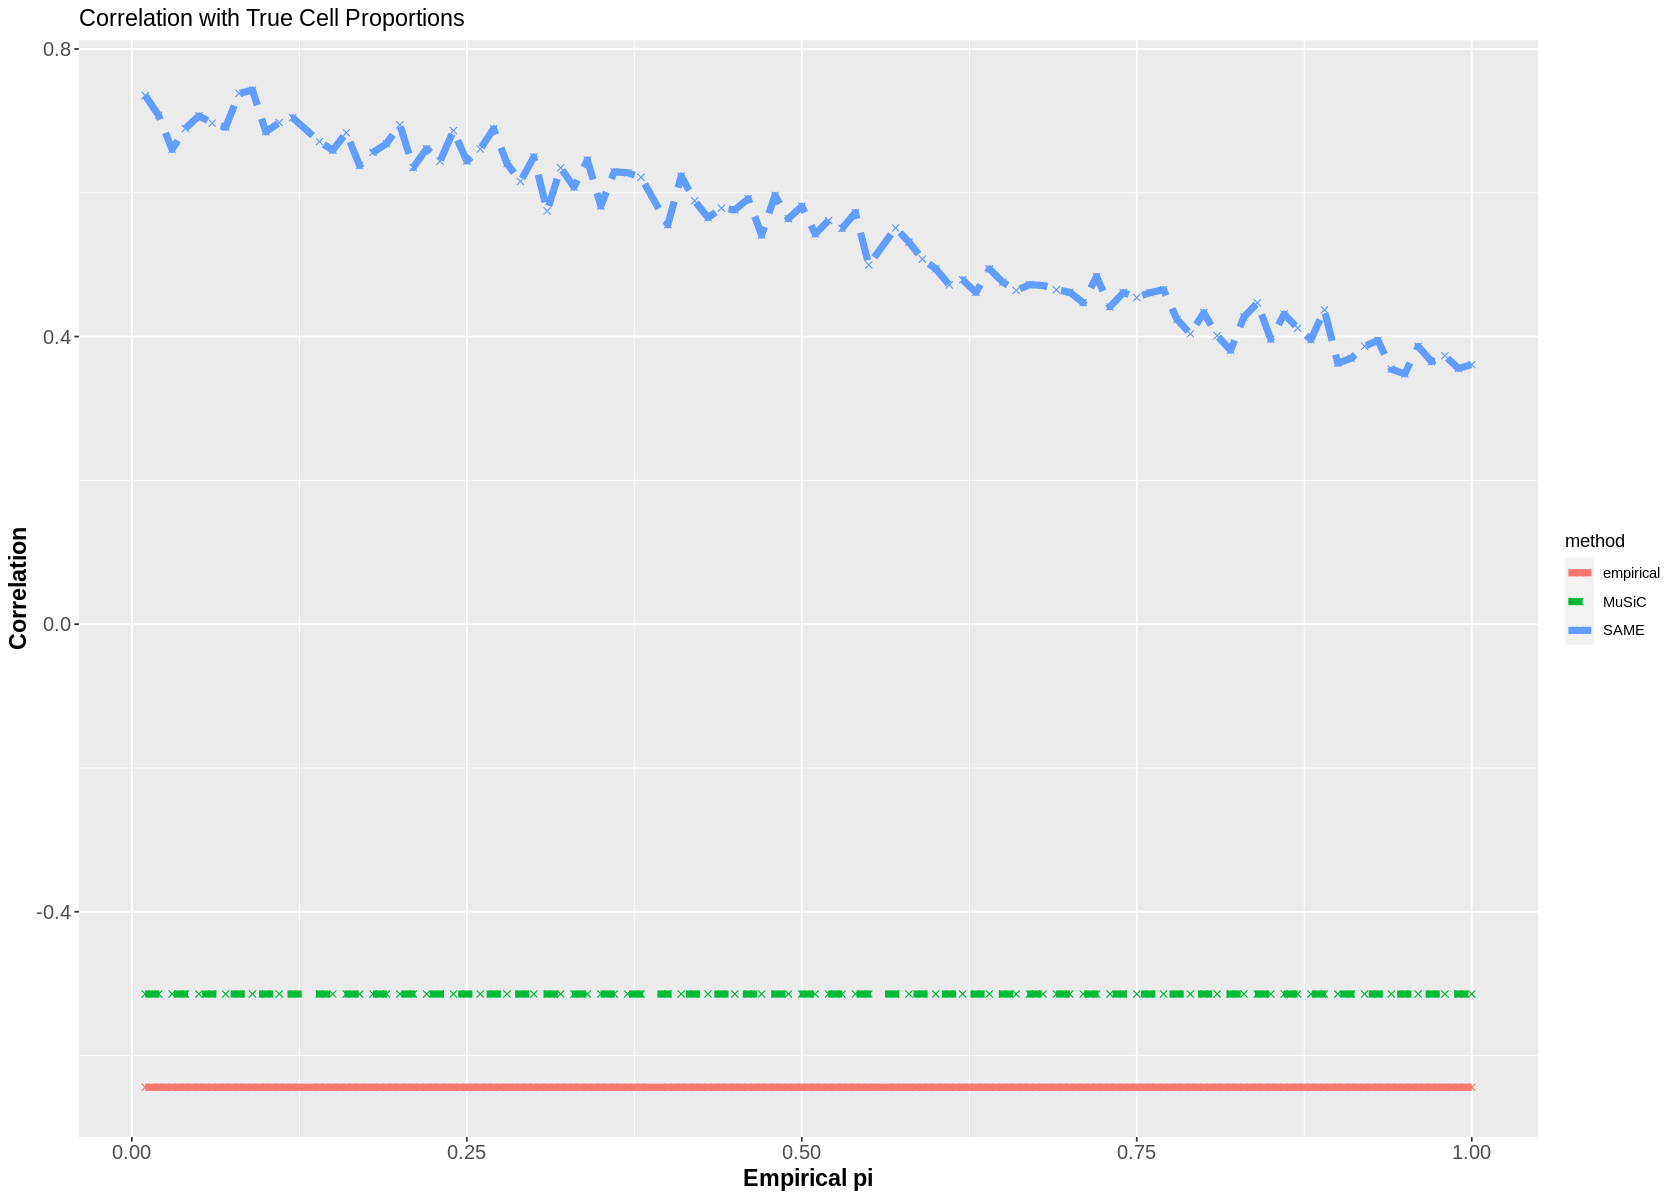

In [137]:
n <- length(pi_list.T) 
dat.T <- data.frame(cor = c(summary.info.T$cor.same,summary.info.T$cor.music,summary.info.T$cor.empirical),
                 pi_list = rep(pi_list.T,3),
                 method = c(rep("SAME",n),rep("MuSiC",n),rep("empirical",n)))

ggplot(dat.T, aes(pi_list,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Empirical pi", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

n <- length(pi_list.F) 
dat.F <- data.frame(cor = c(summary.info.F$cor.same,summary.info.F$cor.music,summary.info.F$cor.empirical),
                 pi_list = rep(pi_list.F,3),
                 method = c(rep("SAME",n),rep("MuSiC",n),rep("empirical",n)))

ggplot(dat.F, aes(pi_list,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Empirical pi", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [139]:
## tau_v

files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tau_v',pattern = "rst.T=*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tau_v',pattern = "rst_frac.*", full.names = TRUE)


In [142]:
get_tau_v <- function(file){
    x = strsplit(file, split='=')[[1]][8]
    x = substr(x,1,nchar(x)-10)
    return(as.numeric(x))
}
tau_v_list <- sapply(files_rst,get_tau_v)
names(tau_v_list) <- NULL

In [143]:
files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tau_v/',tau_v_list,'/raw_same_input.rds')


In [144]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)

In [145]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tau_v.corrupt=0.6.rds")

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



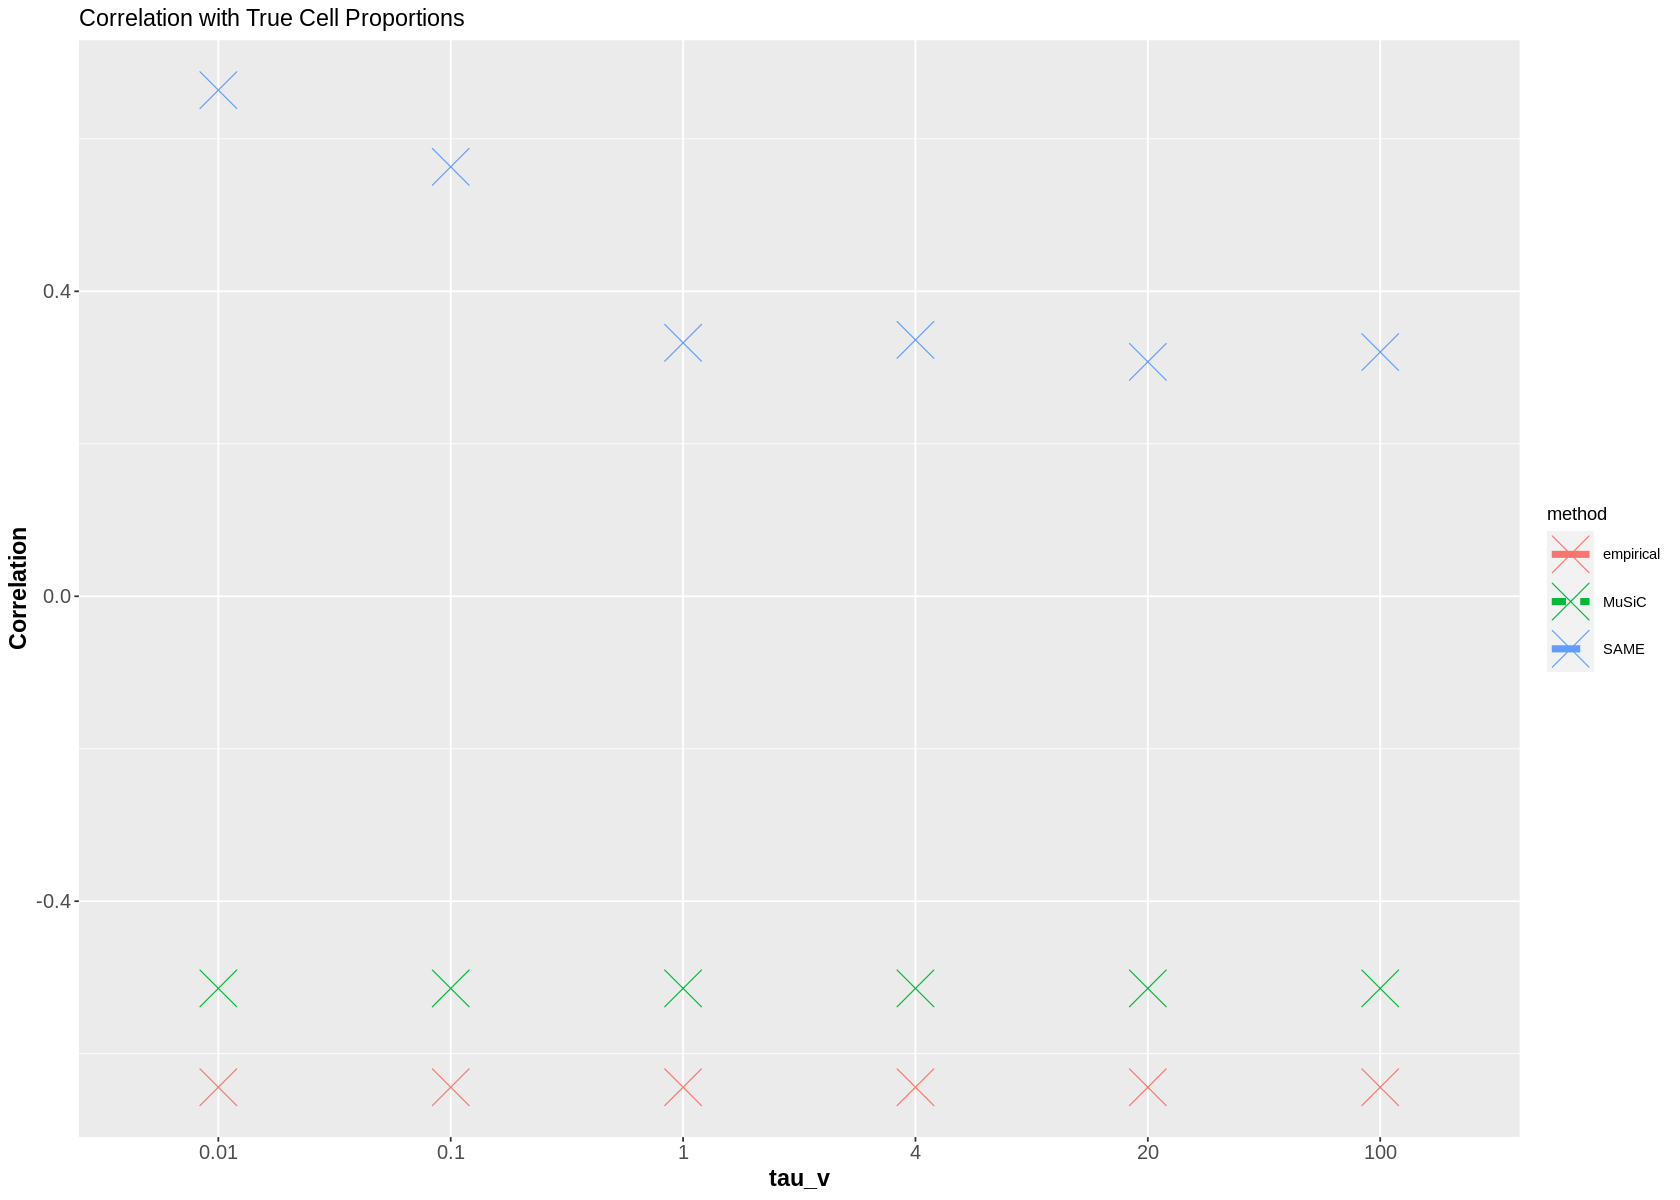

In [150]:
n <- length(tau_v_list) 
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 tau_v_list = rep(factor(tau_v_list),3),
                 method = c(rep("SAME",n),rep("MuSiC",n),rep("empirical",n)))

ggplot(dat, aes(tau_v_list,cor)) + 
geom_point(aes(colour = method), shape = 4, size=10) +
labs(y = 'Correlation', x = "tau_v", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [9]:
## unbalanced
files_rst = "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/unbalanced/rst.T=5.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.rds"
files_rst_frac = "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/unbalanced/rst_frac.T=5.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.rds"

In [10]:
rst <- readRDS(files_rst)
rst_frac <- readRDS(files_rst_frac)

In [9]:
rst[['X']] <- NULL
str(rst)

List of 6
 $ theta1            :List of 1
  ..$ w:List of 5
  .. ..$ : num [1:500, 1:8] 0 0.634 0.369 2.21 0.359 ...
  .. ..$ : num [1:500, 1:8] 2.946 0.685 0.423 2.604 0.348 ...
  .. ..$ : num [1:500, 1:8] 1.703 0.701 0.461 2 0.378 ...
  .. ..$ : num [1:500, 1:8] 2.774 0.641 0.413 1.527 0.349 ...
  .. ..$ : num [1:500, 1:8] 3.059 0.666 1.4 1.74 1.391 ...
 $ theta2            :List of 5
  ..$ gamma :List of 40
  .. ..$ : num [1:500, 1:8] 1 0 0 1 0 1 0 0 1 0 ...
  .. ..$ : num [1:500, 1:8] 1 0 1 1 0 1 1 0 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 0 0 1 1 1 1 0 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 1 0 1 0 1 1 1 1 0 ...
  .. ..$ : num [1:500, 1:8] 1 1 1 1 1 1 0 1 1 0 ...
  .. ..$ : num [1:500, 1:8] 1 1 0 1 0 1 0 0 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 0 0 1 0 1 1 1 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 0 0 1 1 1 1 1 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 1 0 1 1 1 1 1 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 0 0 1 0 1 1 1 1 1 ...
  .. ..$ : num [1:500, 1:8] 1 0 0 1 0 1 1 1 1 1 ...
  .. ..$ : num

In [11]:
files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/unbalanced/raw_same_input.rds')

In [12]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)

In [31]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.unbalanced.corrupt=0.25.rds")

In [13]:
i=1
scatter.df <- data.frame(tranSig = as.vector(summary.info$z_tranSig[[i]]),
                         music = as.vector(summary.info$z_music[[i]]),
                         empirical = as.vector(summary.info$z_empirical[[i]]),
                         true = as.vector(summary.info$z_true[[i]]),
                         celltype = rep(paste0('celltype',c(1:8)),each = 200))

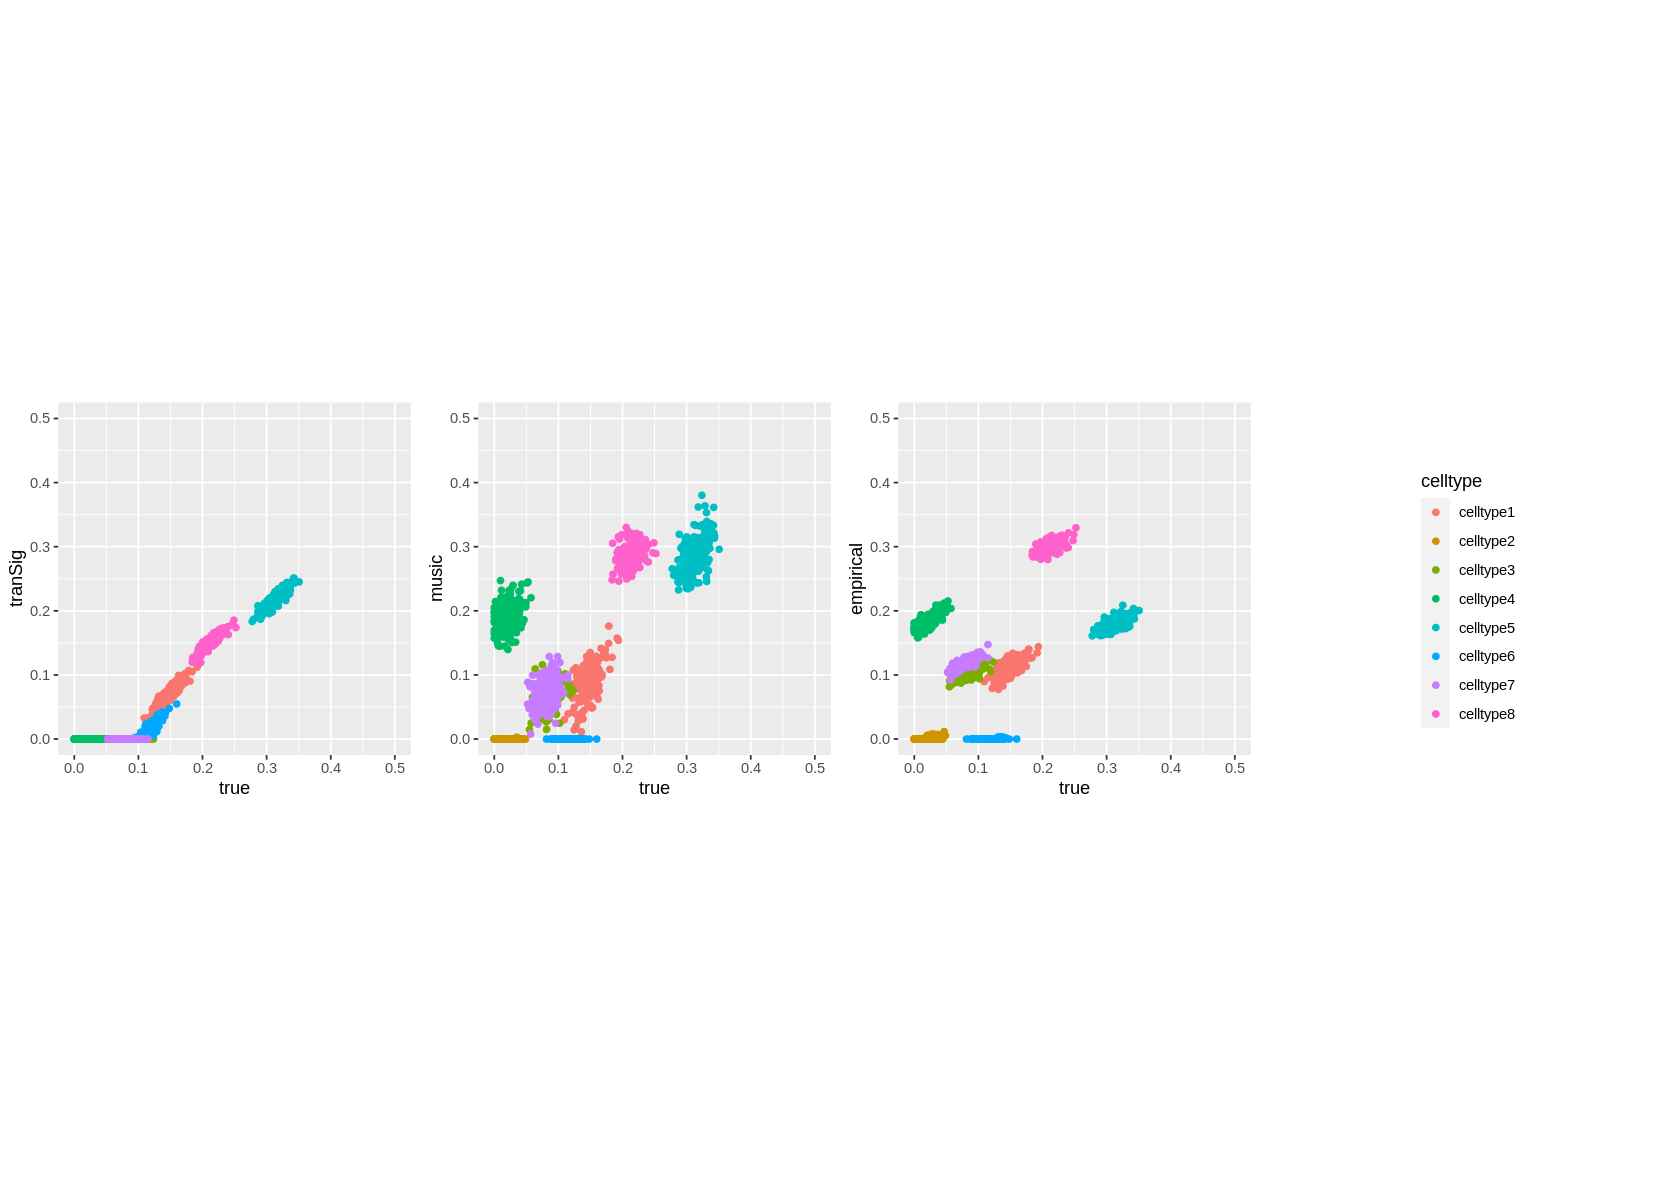

In [14]:
p <- list()
p[[1]]<-ggplot(scatter.df, aes(x=true, y = tranSig, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5) 
p[[2]]<-ggplot(scatter.df, aes(x=true, y = music, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+theme(legend.position="none")
p[[3]]<-ggplot(scatter.df, aes(x=true, y = empirical, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+theme(legend.position="none")
legend <- get_legend(p[[1]])
p[[1]] <- p[[1]] + theme(legend.position="none")


pll <- grid.arrange(p[[1]],p[[2]],p[[3]],legend,ncol=4)

In [29]:
## cleandata for Bolun
rst <- readRDS(files_rst[1])
rst_frac <- readRDS(files_rst_frac[1])
input <- readRDS(files_same_input[1])
X <- readRDS(files_X1[1])
Y0 <- read.table(files_Y0[1])

In [53]:
X

An object of class Seurat 
1020 features across 5378 samples within 1 assay 
Active assay: RNA (1020 features, 0 variable features)

In [26]:
## tissue_number
files_input = list.files(path = '/gpfs/ysm/scratch60/cpsc424/wd262/sc_immune/simulation/tissue_number',pattern = "*", full.names = TRUE)
tissue_number_list <- sapply(files_input, basename)
files_input <- as.vector(sapply(files_input, function(file) paste0(file,'/',c(101:115),'/')))
files_same_input = as.vector(sapply(files_input, function(file) paste0(file,'raw_same_input.rds')))
files_X1 = as.vector(sapply(files_input, function(file) paste0(file,'X_1.rds')))
files_Y0 = as.vector(sapply(files_input, function(file) paste0(file,'Y0.txt')))                                    
                                    
names(tissue_number_list) <- NULL
tissue_number_list <- as.numeric(tissue_number_list)
#tissue_number_list <- sort(tissue_number_list)
tissue_number_list <- rep(tissue_number_list,each=15)
                                    
files_rst <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=",
                    tissue_number_list,".D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")
files_rst_frac <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst_frac.T=",
                    tissue_number_list,".D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds") 
                            
                                 

In [37]:
for(i in 1:length(files_rst)){
    rst <- tryCatch(readRDS(files_rst[i]), error=function(e) NULL)
    input <- tryCatch(readRDS(files_same_input[i]) , error=function(e) NULL)
    if(is.null(rst) || is.null(input))  next                
                      
                      
    write.table(rst$vg, paste0(files_input[i],'W_transig.txt'),quote=F,sep='\t',row.names=F,col.names=F)    
    write.table(input$W_tilde, paste0(files_input[i],'W_empirical.txt'),quote=F,sep='\t',row.names=F,col.names=F)
}   

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=28.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=109.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=29.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=110.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=29.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=111.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number/rst.T=32.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=110.rds', probable reason 'No such file

In [38]:
## gene_number
files_input = list.files(path = '/gpfs/ysm/scratch60/cpsc424/wd262/sc_immune/simulation/gene_number',pattern = "*", full.names = TRUE)
gene_number_list <- sapply(files_input, basename)
files_input <- as.vector(sapply(files_input, function(file) paste0(file,'/',c(101:115),'/')))
files_same_input = as.vector(sapply(files_input, function(file) paste0(file,'raw_same_input.rds')))
files_X1 = as.vector(sapply(files_input, function(file) paste0(file,'X_1.rds')))
files_Y0 = as.vector(sapply(files_input, function(file) paste0(file,'Y0.txt')))   
                                    
names(gene_number_list) <- NULL
gene_number_list <- as.numeric(gene_number_list)
#tissue_number_list <- sort(tissue_number_list)
gene_number_list <- rep(gene_number_list,each=15)
                            
                            
files_rst <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst.T=5.D=",
                    gene_number_list,".K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")
files_rst_frac <- paste0("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst_frac.T=5.D=",
                    gene_number_list,".K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=",
                   rep(c(101:115),38),".rds")                            

In [39]:
for(i in 1:length(files_rst)){
    rst <- tryCatch(readRDS(files_rst[i]), error=function(e) NULL)
    input <- tryCatch(readRDS(files_same_input[i]) , error=function(e) NULL)
    if(is.null(rst) || is.null(input))  next                
                      
                      
    write.table(rst$vg, paste0(files_input[i],'W_transig.txt'),quote=F,sep='\t',row.names=F,col.names=F)    
    write.table(input$W_tilde, paste0(files_input[i],'W_empirical.txt'),quote=F,sep='\t',row.names=F,col.names=F)
} 

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number/rst.T=5.D=1650.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.seed=104.rds', probable reason 'No such file or directory'”


In [40]:
## unbalanced
## unbalanced
files_rst = "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/unbalanced/rst.T=5.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.rds"
files_rst_frac = "/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/unbalanced/rst_frac.T=5.D=500.K=8.corrupt=0.25.tauW=1.tauXdBeta=1.rds"
files_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/unbalanced/')
files_same_input = as.vector(sapply(files_input, function(file) paste0(file,'raw_same_input.rds')))
files_X1 = as.vector(sapply(files_input, function(file) paste0(file,'X_1.rds')))
files_Y0 = as.vector(sapply(files_input, function(file) paste0(file,'Y0.txt')))  

In [41]:
i=1
rst <- tryCatch(readRDS(files_rst[i]), error=function(e) NULL)
input <- tryCatch(readRDS(files_same_input[i]) , error=function(e) NULL)             
                      
write.table(rst$vg, paste0(files_input[i],'W_transig.txt'),quote=F,sep='\t',row.names=F,col.names=F)    
write.table(input$W_tilde, paste0(files_input[i],'W_empirical.txt'),quote=F,sep='\t',row.names=F,col.names=F)